In [1]:
import os 
from glob import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import gdal
import torch

In [7]:
fs

['./data/UNOSAT/U/UNOSAT_Mariupol_Livoberezhyny_AOI_12May2022.shp',
 './data/UNOSAT/U/UNOSAT_Mariupol_Livoberezhyny_DA_12May2022.shp']

In [6]:
fs=glob('./data/UNOSAT/U/*.shp')

In [11]:
k=list(gpd.read_file(fs[1])['d_Main_Dam'])

In [14]:
len([i for i in k if i=='No Visible Damage'])

4910

In [16]:
len(k)-len([i for i in k if i=='No Visible Damage'])

750

In [20]:
set(gpd.read_file(fs[1])['SensorDa_1'])

{'2022-03-14', '2022-05-07', '2022-05-08', '2022-05-12', None}

In [53]:
gpd.read_file(fs[0]).iloc[0]['geometry'].boundary.centroid.exterior

AttributeError: 'Point' object has no attribute 'exterior'

In [77]:
import shapely
k=gpd.read_file(fs[0])
k=k.to_crs(4326)
cp=shapely.geometry.Point(k.iloc[0]['geometry'].boundary.centroid)
print(cp.x,cp.y)

37.654551075492066 47.11555784621512


In [4]:
f_path=glob('LivoberezhnyiandZhovtnevyi_0314/*Point*.shp')[0]
damage_L_gpd_v1=gpd.read_file(f_path)

* 1: 损毁
* 2：重度损毁
* 3：中度损毁
* 4：可能损毁
* 5：道路受损
* 6：农田受损

In [5]:
damage_L_gpd_v1[damage_L_gpd_v1['Main_Damag']==1]['geometry']

2      POINT (37.65228 47.12199)
16     POINT (37.64303 47.11710)
23     POINT (37.63960 47.11635)
57     POINT (37.64832 47.11194)
74     POINT (37.63695 47.10983)
                 ...            
672    POINT (37.52837 47.10148)
693    POINT (37.50250 47.09857)
743    POINT (37.52250 47.10612)
776    POINT (37.64113 47.12042)
777    POINT (37.63024 47.13175)
Name: geometry, Length: 62, dtype: geometry

In [2]:
f_path=glob('LivoberezhnyiandZhovtnevyi_0507-08-12/*AOI*.shp')[0]
AOI_L_gpd=gpd.read_file(f_path)
AOI_L_gpd=AOI_L_gpd.to_crs(4326)

In [3]:
a=AOI_L_gpd.iloc[0]['geometry']

In [4]:
AOI_L_gpd.to_file(f_path)

In [1]:
def test(x, y):
    print(x + y)
eval('test(1,2)')

3


In [2]:
import torch
import os
from glob import glob
files=glob('/home/hk/python_script/Ukraine/data/sample/sample_sentinel2/Livoberezhyny_size6_Destroyed/train/*')
nan_files=[]
for i in files:
    data=torch.load(i)
    img1=torch.tensor(data[1])
    img2=torch.tensor(data[2])
    if torch.isnan(img1).any() or torch.isnan(img2).any():
        nan_files.append(i)
print(len(nan_files))

0


In [5]:
nan_files

['/home/hk/python_script/Ukraine/data/sample/sample_sentinel2/Livoberezhyny_size6_Destroyed/train/N_9506.pth.tar']

In [8]:
import torch
torch.load('/ssd/hk/Ukraine_samples/split_coord_v2/train.pth')[0][1]

'n'

In [7]:
torch.load('/ssd/hk/Ukraine_samples/samplesv1/samples/area1_20220503T082559-20220503T083512-T37TDN_069044.pth')[3].shape

(12, 3, 3)

In [3]:
path='/home/hk/python_script/Ukraine/data/UNOSAT/LivoberezhnyiandZhovtnevyi_0507-08-12/UNOSAT_Mariupol_Livoberezhyny_DA_12May2022.shp'
f=gpd.read_file(path)

In [6]:
f=f.to_crs(4326)

In [7]:
f.to_file(path)

In [8]:
f

,SensorDate,SensorDa_1,Notes,Settlement,Neighborho,EventCode,d_SiteID,d_SensorID,d_Confiden,d_Main_Dam,d_Sensor_1,d_Confid_1,d_Main_D_1,d_Damage_S,d_FieldVal,d_Analyst,geometry
0,2022-03-14,2022-03-14,None,Mariupol,Livoberezhnyi,CE20220223UKR,Building (General / Default),Worldview-2,Very High,Severe Damage,Worldview-2,Very High,Severe Damage,No change,Not yet field validated,MD,POINT (37.65176 47.12118)
1,2022-03-14,2022-03-14,None,Mariupol,Livoberezhnyi,CE20220223UKR,Building (General / Default),Worldview-2,Very High,Severe Damage,Worldview-2,Very High,Severe Damage,No change,Not yet field validated,MD,POINT (37.65166 47.12094)
2,2022-03-14,2022-03-14,None,Mariupol,Livoberezhnyi,CE20220223UKR,Building (General / Default),Worldview-2,Very High,Destroyed,Worldview-2,Very High,Destroyed,No change,Not yet field validated,MD,POINT (37.65228 47.12199)
3,2022-03-14,2022-05-08,None,Mariupol,Livoberezhnyi,CE20220223UKR,Building (General / Default),Worldview-2,Uncertain,Possible Damage,WorldView-3,Very High,Possible Damage,No change,Not yet field validated,MD,POINT (37.64983 47.11908)
4,2022-03-14,2022-05-08,None,Mariupol,Livoberezhnyi,CE20220223UKR,Building (General / Default),Worldview-2,Very High,Severe Damage,WorldView-3,Very High,Severe Damage,No change,Not yet field validated,MD,POINT (37.64871 47.11736)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,2022-03-14,2022-05-12,None,Mariupol,Zhovtnevyi,None,Building (General / Default),Worldview-2,Very High,No Visible Damage,WorldView-3,Very High,Moderate Damage,New - damage,Not yet field validated,SU,POINT (37.56345 47.09363)
5656,2022-03-14,2022-05-12,None,Mariupol,Zhovtnevyi,None,Building (General / Default),Worldview-2,Very High,No Visible Damage,WorldView-3,Very High,Severe Damage,New - damage,Not yet field validated,SU,POINT (37.55714 47.09213)
5657,2022-03-14,2022-05-12,None,Mariupol,Zhovtnevyi,None,Building (General / Default),Worldview-2,Very High,No Visible Damage,WorldView-3,Very High,Severe Damage,New - damage,Not yet field validated,SU,POINT (37.55711 47.09197)
5658,2022-03-14,2022-05-12,None,Mariupol,Zhovtnevyi,None,Building (General / Default),Worldview-2,Very High,No Visible Damage,WorldView-3,Very High,Moderate Damage,New - damage,Not yet field validated,SU,POINT (37.55790 47.09214)


In [52]:
size=6
keys=['A','B','C','D']
dirs=['Livoberezhyny_band2348_v2','Livoberezhyny_bandother_v2']
root='/home/hk/python_script/Ukraine/data/img/Livoberezhyny/'
for dir in dirs:
    for key in keys:
        if dir.split('_')[1]=='bandother':
            size_=int(size/2)
        else:
            size_=int(size)
        path=glob.glob(os.path.join(root+dir,key+'*'))[0]
        ds=gdal.Open(path)
        # if size_==3:
        #     img=ds.ReadAsArray()[:,:,1:]
        #     trf=ds.GetGeoTransform()
        #     trf_new=[trf[0]+trf[1],trf[1],trf[2],trf[3],trf[4],trf[5]]
        #     tif_save(img,path,trf_new)
        # else:
        #     img=ds.ReadAsArray()[:,:,:-1]
        #     trf=ds.GetGeoTransform()
        #     tif_save(img,path,trf)
        trf=ds.GetGeoTransform()
        print(size_)
        print(trf)
        print(trf[0]-trf[1]/2,trf[3]-trf[5]/2)
        print(ds.RasterXSize,ds.RasterYSize)


6
(37.4932545078817, 8.983152841195215e-05, 0.0, 47.14628105644485, 0.0, -8.983152841195215e-05)
37.493209592117495 47.146325972209056
2254 698
6
(37.4932545078817, 8.983152841195215e-05, 0.0, 47.14628105644485, 0.0, -8.983152841195215e-05)
37.493209592117495 47.146325972209056
2254 698
6
(37.4932545078817, 8.983152841195215e-05, 0.0, 47.14628105644485, 0.0, -8.983152841195215e-05)
37.493209592117495 47.146325972209056
2254 698
6
(37.4932545078817, 8.983152841195215e-05, 0.0, 47.14628105644485, 0.0, -8.983152841195215e-05)
37.493209592117495 47.146325972209056
2254 698
3
(37.49334433941012, 0.0001796630568239043, 0.0, 47.14628105644485, 0.0, -0.0001796630568239043)
37.49325450788171 47.14637088797326
1127 349
3
(37.49334433941012, 0.0001796630568239043, 0.0, 47.14628105644485, 0.0, -0.0001796630568239043)
37.49325450788171 47.14637088797326
1127 349
3
(37.49334433941012, 0.0001796630568239043, 0.0, 47.14628105644485, 0.0, -0.0001796630568239043)
37.49325450788171 47.14637088797326
1127

In [51]:
47.146325972209056-47.14637088797326

-4.4915764206621134e-05

In [40]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio import crs
import os
import glob
import gdal
import osr
from pybob.image_tools import create_mask_from_shapefile
from pybob.GeoImg import GeoImg
from tqdm.notebook import tqdm
import xarray as xr
import time
import gc
from rasterio import crs
def tif_save(img,save_name,trf,p='4326'):
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(save_name,img.shape[2],img.shape[1],img.shape[0],6,['COMPRESS=LZW','BIGTIFF=YES'])
    new_img.SetGeoTransform(trf)
    
    if p=='4326':
        sref = osr.SpatialReference()
        sref.ImportFromEPSG(4326)
        proj = sref.ExportToWkt()
    else:
        proj=p
    new_img.SetProjection(proj)
    for i in range(img.shape[0]):
        new_img.GetRasterBand(i+1).WriteArray(img[i,:,:])
    new_img.FlushCache()
    del new_img

In [44]:
list(range(5))[:]

[0, 1, 2, 3, 4]

In [32]:
37.4932545078817-37.493164676353295

8.983152840613684e-05

In [34]:
trf10=(37.4932545078817, 8.983152841195215e-05, 0.0, 47.14628105644485, 0.0, -8.983152841195215e-05)
trf20=(37.493164676353295+0.0001796630568239043, 0.0001796630568239043, 0.0, 47.14628105644485, 0.0, -0.0001796630568239043)


In [37]:
trf10[3]-trf20[3]

0.0

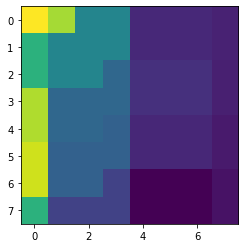

In [22]:
plt.imshow(ds.ReadAsArray()[0,500:508,500:508])

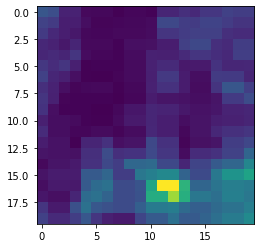

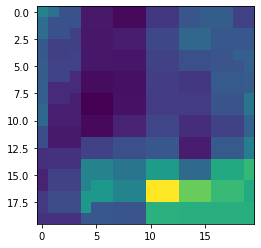

In [26]:
a='/home/hk/python_script/Ukraine/data/img/Livoberezhyny/Livoberezhyny_band2348_v2/A-2021-6-1-2021-10-1.tif'
b='/home/hk/python_script/Ukraine/data/img/Livoberezhyny/Livoberezhyny_bandother_v2/A-2021-6-1-2021-10-1.tif'
ds=gdal.Open(a)
plt.imshow(ds.ReadAsArray()[0,500:520,500:520])
plt.show()
ds=gdal.Open(b)
plt.imshow(ds.ReadAsArray()[0,500:520,500:520])

In [1]:
import os
import matplotlib.pyplot as plt
os.chdir('./data/UNOSAT/Syria/')
from glob import glob
shp_file=glob('Homs/*.shp')

# 转换边界文件

In [55]:
pd=gpd.read_file(glob('Hama/1_Set*.shp')[0])
pd=pd.to_crs(4326)
idxs=[5,2,0,23,1,3]
name=[pd.iloc[i]['Name'] for i in idxs]
name=[i.replace(' ','-') for i in name]
for i in idxs:
    s_sub=pd.iloc[i]
    pd_sub=gpd.GeoDataFrame({'Name':s_sub.Name,'Source':s_sub.Source,'geometry':s_sub.geometry},index=[0])
    pd_sub.to_file(s_sub.Name+'_settlements.shp')

# 转换点文件

In [169]:
def get_pandas(pd,id):
    c=['SiteID','SensDt','DmgCls','StlmtNme','geometry']
    c2=c.copy()
    if id>1.2:
        c2[1]+=f'_{str(id)}'
        c2[2]+=f'_{str(id)}'
    pd_sub=pd[pd[c2[2]].notnull()]
    pd_sub_c=pd_sub.reindex(columns=c2)
    pd_sub_c=pd_sub_c.rename(columns={c2[1]:c[1]})    
    pd_sub_c=pd_sub_c.rename(columns={c2[2]:c[2]})
    print(len(pd_sub))
    return pd_sub_c
k=['A','B','C','D','E']
for n in name:
    n=n.replace('-','_')
    f=glob(f'Hama/*Damage_Sites_{n}*.shp')[0]
    pd=gpd.read_file(f)
    pd=pd.to_crs(4326)
    dates_n=np.array([int(i[-1]) for i in list(pd.columns) if 'SensID' in i ]).max()
    print(dates_n)
    for date in range(1,dates_n+1):
        pd_sub=get_pandas(pd,date)
        d=list(pd_sub['SensDt'])[0]
        print(d)
        n_=n.replace('_','-')
        f_name=f'{n_}_{k[date-1]}_{d}.shp'
        print(f_name)
        pd_sub.to_file(f_name)


4
572
2013-09-23
Aleppo_A_2013-09-23.shp
7678
2014-05-23
Aleppo_B_2014-05-23.shp
12576
2015-04-26
Aleppo_C_2015-04-26.shp
35936
2016-09-18
Aleppo_D_2016-09-18.shp
3
351
2013-10-22
Raqqa_A_2013-10-22.shp
493
2014-02-12
Raqqa_B_2014-02-12.shp
1696
2015-05-29
Raqqa_C_2015-05-29.shp
4
224
2013-09-15
Idlib_A_2013-09-15.shp
340
2014-05-02
Idlib_B_2014-05-02.shp
588
2015-04-06
Idlib_C_2015-04-06.shp
1350
2016-08-01
Idlib_D_2016-08-01.shp
2
9909
2013-09-26
Homs_A_2013-09-26.shp
14018
2014-04-21
Homs_B_2014-04-21.shp
3
4976
2013-09-26
Hama_A_2013-09-26.shp
5284
2014-03-05
Hama_B_2014-03-05.shp
10885
2016-07-06
Hama_C_2016-07-06.shp
4
2020
2013-10-24
Deir-ez-Zor_A_2013-10-24.shp
3169
2014-05-13
Deir-ez-Zor_B_2014-05-13.shp
3518
2015-05-10
Deir-ez-Zor_C_2015-05-10.shp
4905
2016-05-25
Deir-ez-Zor_D_2016-05-25.shp


F

In [182]:
for n in name:
    n=n.replace('-','_')
    f=glob(f'Hama/*No*{n}*.shp')[0]
    pd=gpd.read_file(f)
    pd=pd.to_crs(4326)
    n_=n.replace('_','-')
    filename=f'{n_}_NoAnalysis.shp'
    print(filename)
    pd.to_file(filename)
pd=gpd.read_file('Hama/3_Cloud_Cover_Aleppo_20140523.shp')
pd=pd.to_crs(4326)
pd.to_file('Aleppo_B_cloud.shp')
pd=gpd.read_file('Hama/3_Cloud_Cover_Idlib_20140502.shp')
pd=pd.to_crs(4326)
pd.to_file('Idlib_B_cloud.shp')

Aleppo_NoAnalysis.shp
Raqqa_NoAnalysis.shp
Idlib_NoAnalysis.shp
Homs_NoAnalysis.shp
Hama_NoAnalysis.shp
Deir-ez-Zor_NoAnalysis.shp


In [2]:
from glob import glob
import geopandas as gpd
for f in glob('./data/UNOSAT/Syria/*settlements*.shp'):
    df=gpd.read_file(f)
    print(f)
    bd=df['geometry'].bounds
    print(bd)


./data/UNOSAT/Syria/Homs_settlements.shp
        minx       miny       maxx       maxy
0  36.666741  34.683229  36.761799  34.765783
./data/UNOSAT/Syria/Idlib_settlements.shp
        minx       miny       maxx       maxy
0  36.613913  35.908796  36.668796  35.946605
./data/UNOSAT/Syria/Raqqa_settlements.shp
       minx       miny       maxx      maxy
0  38.92972  35.929156  39.063064  35.97517
./data/UNOSAT/Syria/Aleppo_settlements.shp
        minx       miny       maxx       maxy
0  37.033496  36.132468  37.335825  36.295205
./data/UNOSAT/Syria/Deir-ez-Zor_settlements.shp
        minx       miny       maxx       maxy
0  40.081601  35.298761  40.179255  35.362526
./data/UNOSAT/Syria/Hama_settlements.shp
        minx       miny       maxx      maxy
0  36.716995  35.080163  36.802805  35.18342


In [13]:
ge[0].bounds

(36.71699520000004, 35.08016270000007, 36.802804500000036, 35.18341950000007)

In [7]:
for f in glob('./data/UNOSAT/Syria/*_A-B_*'):

    # print(f)
    f2=f.replace('_A-B_','_B_')
    print(f2)
    os.rename(f,f2)

./data/UNOSAT/Syria/Homs_B_2013-09-26.dbf
./data/UNOSAT/Syria/Raqqa_B_2013-10-22.shp
./data/UNOSAT/Syria/Idlib_B_2013-09-15.prj
./data/UNOSAT/Syria/Deir-ez-Zor_B_2013-10-24.dbf
./data/UNOSAT/Syria/Hama_B_2013-09-26.prj
./data/UNOSAT/Syria/Aleppo_B_2013-09-23.dbf
./data/UNOSAT/Syria/Aleppo_B_2013-09-23.prj
./data/UNOSAT/Syria/Raqqa_B_2013-10-22.dbf
./data/UNOSAT/Syria/Idlib_B_2013-09-15.shp
./data/UNOSAT/Syria/Raqqa_B_2013-10-22.shx
./data/UNOSAT/Syria/Deir-ez-Zor_B_2013-10-24.prj
./data/UNOSAT/Syria/Hama_B_2013-09-26.shx
./data/UNOSAT/Syria/Hama_B_2013-09-26.shp
./data/UNOSAT/Syria/Homs_B_2013-09-26.shp
./data/UNOSAT/Syria/Deir-ez-Zor_B_2013-10-24.shx
./data/UNOSAT/Syria/Hama_B_2013-09-26.cpg
./data/UNOSAT/Syria/Homs_B_2013-09-26.shx
./data/UNOSAT/Syria/Aleppo_B_2013-09-23.cpg
./data/UNOSAT/Syria/Idlib_B_2013-09-15.dbf
./data/UNOSAT/Syria/Aleppo_B_2013-09-23.shp
./data/UNOSAT/Syria/Homs_B_2013-09-26.cpg
./data/UNOSAT/Syria/Idlib_B_2013-09-15.shx
./data/UNOSAT/Syria/Raqqa_B_2013-10-22.c

In [2]:
pip install thop

You should consider upgrading via the '/home/hk/miniconda3/envs/pythonhzy/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import torchvision
from thop import profile
from model import resnet9v2,resnet18v2,resnet50v2
from model import resnet9,resnet18,resnet50
re9v2=resnet9v2.resnet9v2()
re18v2=resnet18v2.resnet18v2()
re50v2=resnet50v2.resnet50v2()
re9=resnet9.resnet9()
re18=resnet18.resnet18()
re50=resnet50.resnet50()
input=torch.randn(1,6,6,6)
flops,params=profile(re9v2,(input,))
print('resnet9v2','flops:',flops/1e6,'m','params:',params/1e6,'m')
flops,params=profile(re18v2,(input,))
print('resnet18v2','flops:',flops/1e6,'m','params:',params/1e6,'m')
flops,params=profile(re50v2,(input,))
print('resnet50v2','flops:',flops/1e6,'m','params:',params/1e6,'m')
input=torch.randn(1,6,120,120)
flops,params=profile(re9,(input,))
print('resnet9','flops:',flops/1e6,'m','params:',params/1e6,'m')
flops,params=profile(re18,(input,))
print('resnet18','flops:',flops/1e6,'m','params:',params/1e6,'m')
flops,params=profile(re50,(input,))
print('resnet50','flops:',flops/1e6,'m','params:',params/1e6,'m')

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_avgpool() for <class 'torch.nn.modules.pooling.AvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
resnet9v2 flops: 293.145088 m params: 12.207362 m
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_avgpool() for <class 'torch.nn.modules.pooling.AvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linea

In [1]:
import torch
import torchvision
from thop import profile
from model import mynet6
model=mynet6.mynet6()

input=torch.randn(1,6,6,6)
model(input).shape
flops,params=profile(model,(input,))
print('mynet','flops:',flops/1e6,'m','params:',params/1e6,'m')


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_bn() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'model.mynet6.Bottleneck'>. Treat it as zero Macs and zero Params.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.activation.Sigmoid'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'model.mynet6.SELayer'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn

In [5]:
import torch
import torchvision
from pytorch_model_summary import summary

print(summary(model, input, show_input=False, show_hierarchical=False))

-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Conv2d-1       [1, 64, 6, 6]             384             384
     BatchNorm2d-2       [1, 64, 6, 6]             128             128
            ReLU-3       [1, 64, 6, 6]               0               0
      Bottleneck-4      [1, 256, 6, 6]          42,240          42,240
      Bottleneck-5      [1, 512, 6, 6]         248,320         248,320
         SELayer-6      [1, 512, 6, 6]          32,768          32,768
          Conv2d-7      [1, 128, 6, 6]          65,536          65,536
     Transformer-8        [1, 36, 128]         557,952         557,952
     Transformer-9        [1, 36, 128]         557,952         557,952
         Linear-10          [1, 36, 4]             516             516
      LayerNorm-11            [1, 144]             288             288
         Linear-12              [1, 2]             290             290
Total

In [3]:
pip install pytorch_model_summary

You should consider upgrading via the '/home/hk/miniconda3/envs/pythonhzy/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import random
for i in range(1000):
    l=16
    del_num=random.randint(0,l-3)#最少留3个
    # copy_num=random.randint(0,del_num)
    copy_num=del_num
    index=list(range(l))
    copy_index=random.sample(range(0, l), copy_num)
    index+=copy_index
    index.sort()
    del_index=random.sample(range(0, len(index)), del_num)
    index_=[index[i] for i in range(len(index)) if i not in del_index]
    if len(index_)>16:
        raise()

In [51]:
import torch
p='/ssd/hk/Ukraine_samples/split_coord_v2/train.pth'
t=torch.load(p)

In [52]:
for i in range(len(t)):
    data=torch.load(t[i][0])
    img10=data[2]
    img20=data[1]
    break

In [53]:
img10

array([[[ 950,  894,  907,  907,  920, 1013],
        [ 930,  900,  900,  891,  941, 1074],
        [ 858,  897,  897,  876,  974, 1115],
        [ 900,  899,  899,  894, 1023, 1048],
        [ 877,  877,  898,  952, 1142, 1172],
        [ 895,  895,  965,  981,  934,  925]],

       [[ 828,  696,  767,  767,  752,  815],
        [ 733,  663,  663,  708,  846,  960],
        [ 670,  701,  701,  709,  765, 1053],
        [ 823,  851,  851,  756,  876,  988],
        [ 761,  761,  770,  784, 1016, 1030],
        [ 712,  712,  784,  869,  775,  710]],

       [[ 608,  447,  452,  452,  532,  656],
        [ 573,  451,  451,  476,  620,  775],
        [ 436,  444,  444,  452,  627,  814],
        [ 482,  524,  524,  469,  666,  814],
        [ 461,  461,  509,  543,  901, 1012],
        [ 491,  491,  575,  764,  592,  534]],

       [[2009, 1937, 2355, 2355, 2378, 2015],
        [1726, 2133, 2133, 2146, 2718, 2289],
        [2079, 2475, 2475, 2198, 2107, 2486],
        [2337, 2250, 2250, 2

In [70]:
t=torch.load('/ssd/hk/Ukraine_samples/split_coord_v2/samples.pth')['train']
v=torch.load('/ssd/hk/Ukraine_samples/split_coord_v2/samples.pth')['val']
t2=[]
for coord,data in t.items ():
    a=[i[0] for i in data]
    b=[i[1] for  i in data]
    d={}
    for i in range(len(a)):
        d[a[i]]=b[i]
    a.sort()
    b2=[d[i] for i in a]
    l=len(a)
    a+=[None]*int(20-l)
    b+=[None]*int(20-l)
    if a==[None]*20:
        print('a')
        continue
    t2.append([a,b])
v2=[]
for coord,data in v.items ():
    a=[i[0] for i in data]
    b=[i[1] for  i in data]
    d={}
    for i in range(len(a)):
        d[a[i]]=b[i]
    a.sort()
    b2=[d[i] for i in a]
    l=len(a)
    a+=[None]*int(20-l)
    b+=[None]*int(20-l)
    if a==[None]*20:
        print('a')
        continue
    v2.append([a,b])
import random
import numpy as np
random.shuffle(t2)
random.shuffle(v2)

a
a


In [71]:
import random
import numpy as np
random.shuffle(t2)
random.shuffle(v2)

In [38]:
np.array([len(i[0]) for i in t2]).max()

19

In [40]:
np.array([len(i[0]) for i in v2]).max()

17

In [72]:
torch.save(t2,'/ssd/hk/Ukraine_samples/split_coord_v3/train.pth')
torch.save(v2,'/ssd/hk/Ukraine_samples/split_coord_v3/val.pth')

In [74]:
for i in np.array([len(i[0]) for i in t2]):
    if i!=20:
        print('a')

In [1]:
import numpy as np

In [2]:
a=np.zeros((6,6,8))
a[:,:,:3].shape

(6, 6, 3)

In [3]:
a[:,:,4:7].shape

(6, 6, 3)

In [4]:
img=np.concatenate([a[:,:,:3],a[:,:,4:7]],axis=2)
img.shape

(6, 6, 6)

In [57]:
from glob import glob
len(glob('/ssd/hk/Syria_samples/samples/pre/*'))

263770

In [59]:
len(glob('/media/hzy/hk/Syria_samples/samples_enhance_v2/pre/*'))

798889

In [60]:
len(glob('/media/hzy/hk/Syria_samples/samples_enhance_v2/post/*'))

798889

In [25]:
len(glob('/MobileData2/hk/Syria_samples/*/*/*'))

118089

In [7]:
import geopandas as gpd
from glob import glob
glob('/home/hk/python_script/Ukraine/data/UNOSAT/Syria2/*Sites_Aleppo*.shp')
# gpd.read_file('/home/hk/python_script/Ukraine/data/UNOSAT/Syria2/')

['/home/hk/python_script/Ukraine/data/UNOSAT/Syria2/6_Damage_Sites_Aleppo_SDA.shp']

In [10]:
f=gpd.read_file('/home/hk/python_script/Ukraine/data/UNOSAT/Syria2/6_Damage_Sites_Aleppo_SDA.shp')
f['DmgSts_4']

0           No change
1           No change
2           No change
3           No change
4           No change
             ...     
35931    New - damage
35932    New - damage
35933    New - damage
35934    New - damage
35935    New - damage
Name: DmgSts_4, Length: 35936, dtype: object

In [11]:
set(list(f['DmgSts_4']))


{'Decrease - damage', 'Increase - damage', 'New - damage', 'No change'}

In [13]:
f[f.DmgSts_4=='Decrease - damage']['DmgCls_3']

17       Severe Damage
22       Severe Damage
2126     Severe Damage
2142     Severe Damage
2143         Destroyed
             ...      
32617        Destroyed
32618        Destroyed
32623        Destroyed
32756        Destroyed
32801    Severe Damage
Name: DmgCls_3, Length: 587, dtype: object

In [14]:
f[f.DmgSts_4=='Decrease - damage']['DmgCls_4']

17       Moderate Damage
22       Moderate Damage
2126     Moderate Damage
2142     Moderate Damage
2143       Severe Damage
              ...       
32617      Severe Damage
32618      Severe Damage
32623      Severe Damage
32756      Severe Damage
32801    Moderate Damage
Name: DmgCls_4, Length: 587, dtype: object

In [96]:
import torch 
k=torch.load('/ssd/hk/Syria_samples/split_havedamaged_size6_all_v3/val.pth')
z=[]
r=[]
for i in k:
    z1=[j for j in i[1] if j is not None]
    z1=[0 if j=='n' else 1 for j in z1]
    if np.array(z1).sum()>0 and z1[-1]==0:
        r.append(i)
    

In [94]:
kk=k+r*50
print(len(k),len(kk))
import random
random.shuffle(kk)

55922 61022


In [97]:
torch.save(k,'/ssd/hk/Syria_samples/split_havedamaged_size6_all_v3_rebuildingmulti50/val.pth')

In [53]:
import torch
import numpy as np
k=torch.load('/ssd/hk/Syria_samples/split_havedamaged_size120_all_v3/val.pth')+torch.load('/ssd/hk/Syria_samples/split_havedamaged_size120_all_v3/train.pth')

In [54]:
z=[]
r=[]
for i in k:
    z1=[j for j in i[1] if j is not None]
    z1=[0 if j=='n' else 1 for j in z1]
    if np.array(z1).sum()>0:
        r.append(i)

In [6]:
len(r)

5834

In [7]:
len(k)

79895

In [8]:
h=[]

In [58]:
h=[]
for i in r:
    p=[j for j in i[0] if j is not None]
    l=[j for j in i[1] if j is not None]
    h.append([p,l])

In [56]:
ppp=0
for i in h:
    if i[1]=='n':
        ppp+=1
print(ppp)

144


In [61]:
import random

In [62]:
random.shuffle(h)
torch.save(h,'/ssd/hk/Syria_samples/samples_rebuilding/damagesequence_lastimg_size120_pathes.pth')
torch.save(h[:2917],'/ssd/hk/Syria_samples/samples_rebuilding/damagesequence_lastimg_size120_pathes_half.pth')

In [63]:
len(h)/2

2917.0

In [64]:
hh=torch.load('/ssd/hk/Syria_samples/samples_rebuilding/damagesequence_lastimg_size120_pathes_half.pth')

In [1]:
from glob import glob

In [14]:
fs=glob('/data4/Syria_img/*treated.tif')
fs.sort()
fs2=[]
for f in fs:
    a=True
    for i in ['rebuilding','A-B-2','A-B-3']:
        if i in f:
            a=False
    if a:
        fs2.append(f)
len(fs2)

85

In [68]:
hhh=[]
rebuilding120_root='/ssd/hk/Syria_samples/samples_rebuilding/size120/'
for c in hh:
    i=c[0]
    a=[]
    a+=i
    if os.path.basename(i[-1]).split('_')[0]!='Raqqa':
        for t in range(1,4):
            a.append(rebuilding120_root+os.path.basename(i[-1]).split('_')[0]+f'_rebuilding-{t}_'+os.path.basename(i[-1]).split('_')[2])
    else:
        a.append(rebuilding120_root+os.path.basename(i[-1]).split('_')[0]+'_rebuilding-1_'+os.path.basename(i[-1]).split('_')[2])
    hhh.append([a,[c[1]]])

In [69]:
len(hhh)

2917

In [71]:
ppp=0
for i in hhh:
    if i[1][0][-1]=='n':
        ppp+=1
print(ppp)

75


In [14]:
hhh[0]

[['/ssd/hk/Syria_samples/samples_enhance_v2/post/Aleppo_enhance-E-Z-3_035226.png',
  '/ssd/hk/Syria_samples/samples_rebuilding/size120/Aleppo_rebuilding-1_035226.png',
  '/ssd/hk/Syria_samples/samples_rebuilding/size120/Aleppo_rebuilding-2_035226.png',
  '/ssd/hk/Syria_samples/samples_rebuilding/size120/Aleppo_rebuilding-3_035226.png'],
 ['p']]

In [72]:
torch.save(hhh,'/ssd/hk/Syria_samples/samples_rebuilding/maskrebuilding_samples_pathes.pth')

In [22]:
import gdal
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#EDB87E','#EDB87E','#F8AE0D','#F8AE0D','#9B2F09','#9B2F09','#1B3359','#1B3359']

In [23]:
m2=gdal.Open('/data4/Ukraine_img/frequence.tif').ReadAsArray()

In [24]:
newcmp = LinearSegmentedColormap.from_list('chaos',clist)

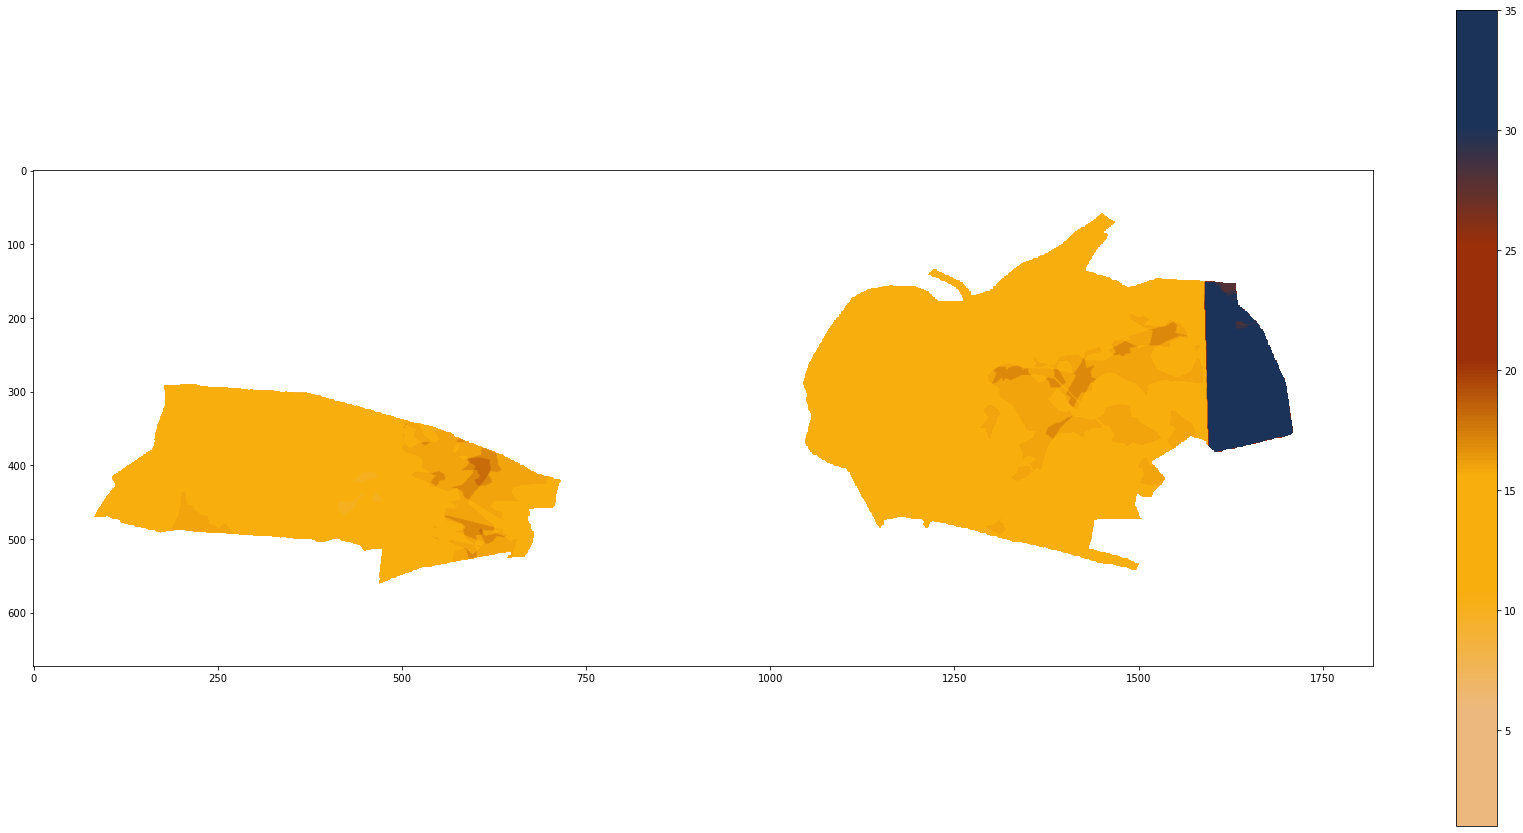

In [25]:
plt.figure(figsize=(30,15))
plt.imshow(m2,cmap=newcmp)
plt.colorbar()

In [7]:
from glob import glob
import gdal
ips=glob('/data4/USA/labels/*4326.tif')

In [9]:
for i in ips:
    ds=gdal.Open(i)
    print(ds.GetGeoTransform())
    # print(ds.GetProjection())

(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)
(-127.88721217969017, 0.000325900410757084, 0.0, 51.60512156832182, 0.0, -0.000325900410757084)


In [10]:
img=ds.ReadAsArray()
print(img.shape)

(87956, 191904)


In [78]:
ds=gdal.Open('/data4/USA/shps/NorthDakota.tif')
ds.RasterXSize

30000

In [79]:
ds.RasterYSize

13000

In [19]:
import geopandas as gpd
shp=gpd.read_file('/data4/USA/shps/gadm36_USA_1.shp')
ND=shp[shp.NAME_1=='North Dakota']

In [20]:
ND

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
34,USA,United States,USA.35_1,North Dakota,ND|N.D.,None,State,State,None,US.ND,"POLYGON ((-102.99555 45.94400, -104.04429 45.9..."


In [22]:
ND.to_file('/data4/USA/shps/North_Dakota.shp')

<AxesSubplot:>

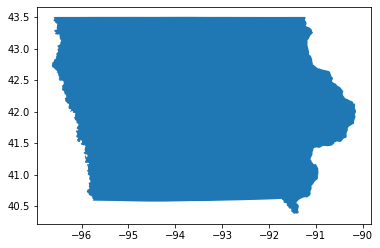

In [5]:
iowa.plot()

In [10]:
p=ds.GetProjection()
trf=ds.GetGeoTransform()
shape=(87956, 191904)

In [1]:
from pybob.GeoImg import GeoImg
from pybob.image_tools import create_mask_from_shapefile
import numpy as np 
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio import crs
import os
import glob
import gdal
import osr
from pybob.image_tools import create_mask_from_shapefile
from pybob.GeoImg import GeoImg
from tqdm.notebook import tqdm
import xarray as xr
import time
import gc
from rasterio import crs
def get_mask(maskshp,geotrf,shape,p='4326'):
    img=np.zeros((shape[0],shape[1]),dtype=np.int8)
    
    if p=='4326':
        sref = osr.SpatialReference()
        sref.ImportFromEPSG(4326)
        proj = sref.ExportToWkt()
    else:
        proj=p
    
    trf=(geotrf[0], geotrf[1], geotrf[2], geotrf[3], geotrf[4], geotrf[5])
    drv = gdal.GetDriverByName('MEM')
    dst = drv.Create('', shape[1], shape[0], 1, gdal.GDT_Byte)
    print(dst)
    sp = dst.SetProjection(proj)
    sg = dst.SetGeoTransform(trf)

    wa = dst.GetRasterBand(1).WriteArray(img)
    del wa, sg, sp
    img_bob = GeoImg(dst)
    mask = create_mask_from_shapefile(img_bob, maskshp)
    return mask
def myreproject_to_84(src_img, dst_img, dst_crs_code="4326"):
    dst_crs = {'init': 'EPSG:%s'%dst_crs_code}
#     dst_crs = crs.CRS.from_epsg(32646)
    with rasterio.open(src_img) as src_ds:
        profile = src_ds.profile
        # 计算在新空间参考系下的仿射变换参数，图像尺寸
        dst_transform, dst_width, dst_height = calculate_default_transform(src_ds.crs, dst_crs, src_ds.width, src_ds.height, *src_ds.bounds)

        # 更新数据集的元数据信息
        profile.update({
            'crs': dst_crs,
            'transform': dst_transform,
            'width': dst_width,
            'height': dst_height,
            'nodata': 0,
            'COMPRESS':'LZW'
        })

        # 重投影并写入数据
        print("%s*******start reproject: *********"%dst_img)
        with rasterio.open(dst_img, 'w', **profile) as dst_ds:
            for i in range(1, src_ds.count + 1):
                src_array = src_ds.read(i)
#                 src_array[src_array<0]=0
#                 src_array[src_array==0]=-1
                dst_array = np.empty((dst_height, dst_width), dtype=profile['dtype'])

                reproject(
                    # 源文件参数
                    source=src_array,
                    src_crs=src_ds.crs,
                    src_transform=src_ds.transform,
                    # 目标文件参数
                    destination=dst_array,
                    dst_transform=dst_transform,
                    dst_crs=dst_crs,
                    # 其它配置
                    resampling=Resampling.nearest,
                    num_threads=2)

                dst_ds.write(dst_array, i)
#制作mask
def tif_save(img,save_name,trf,p='4326'):
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(save_name,img.shape[1],img.shape[0],1,6,['COMPRESS=LZW','BIGTIFF=YES'])
    new_img.SetGeoTransform(trf)
    
    if p=='4326':
        sref = osr.SpatialReference()
        sref.ImportFromEPSG(4326)
        proj = sref.ExportToWkt()
    else:
        proj=p
    new_img.SetProjection(proj)
    new_img.GetRasterBand(1).SetNoDataValue(0)
    new_img.GetRasterBand(1).WriteArray(img)
    new_img.FlushCache()
    del new_img

In [5]:
import torch
import numpy as np
v=torch.load(f'/ssd/hk/Syria_samples/split_havedamaged_size6_all_v3/train.pth')
len(v)

55922

In [6]:
n=0
p=[]
rebuilding=[]
for i in v:
    a=[j for j in i[1] if j is not None]
    aa=[0 if jj=='n' else 1 for jj in a]
    if np.array(aa).sum()>0:
        n+=1
        p.append(i)
        if aa[-1]==0:
            rebuilding.append(i)
        # print(i)
        # break   
    # break
print(n)

4086


In [7]:
print(len(p))
print(len(rebuilding))
torch.save(p,f'/ssd/hk/Syria_samples/split_havedamaged_size6_all_v3_p/train.pth')


4086
102


In [52]:
p=torch.load('/ssd/hk/Syria_samples/split_havedamaged_size6_all_v3_p/val.pth')
for i in p:
    # print(i[1])
    a=[j for j in i[1] if j is not None]
    aa=[0 if jj=='n' else 1 for jj in a]
    if aa[-1]==0:
        # print(aa)

SyntaxError: unexpected EOF while parsing (344596909.py, line 7)

In [26]:

def get_index(x):
    n=0
    for i in x:
        n+=1
        if i=='p':
            break
    return n-1
get_index(i[1])

5

In [48]:
p=torch.load('/ssd/hk/Syria_samples/split_havedamaged_size6_all_v3_p/train.pth')
hh=[]
for i in p:
    index=get_index(i[1])
    hh.append([[i[0][0]]+i[0][index:]+[None]*index,[i[1][0]]+i[1][index:]+[None]*index])
torch.save(hh,'/ssd/hk/Syria_samples/split_havedamaged_size6_all_v3_p_only/train.pth')

In [59]:
from glob import glob
fs=glob('/ssd/hk/img/*tif')

In [60]:
len(fs)

63

In [58]:
for f in fs:
    f2='/ssd/hk/img/'+os.path.basename(f)
    shutil.move(f,f2)

In [57]:
import shutil

In [64]:
import gdal

ds=gdal.Open(fs[0])
print(ds.GetGeoTransform())
print(ds.GetProjection())

(-99.22036043545575, 0.00026949458523585647, 0.0, 46.586720465966806, 0.0, -0.00026949458523585647)
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [65]:
img=ds.ReadAsArray()

In [66]:
img.shape

(7, 2419, 8960)

In [70]:
np.nanmax(img)

0.7168362500000001

In [74]:
img.dtype

dtype('float64')

In [93]:
for year in ['2014','2015','2016','2017','2018','2019','2020','2021']:
    p=f'/ssd/hk/img/{year}.tif'
    if os.path.exists(p):
        print(year)
        ds=gdal.Open(p)
        trf=ds.GetGeoTransform()
        print(trf)
        shape=(ds.RasterYSize,ds.RasterXSize)
        print(shape)

2014
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)
2015
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)
2016
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)
2017
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)
2018
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)
2019
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)
2020
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)
2021
(-104.0497034028823, 0.0003, 0.0, 49.00139194968008, 0.0, -0.0003)
(10221, 24982)


In [89]:
for f in glob('/ssd/hk/img/labels/*NorthDakota.tif'):
    ds=gdal.Open(f)
    print(ds.GetGeoTransform()) 

(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)
(-105.07418342669429, 0.000325900410757084, 0.0, 49.32381869302223, 0.0, -0.000325900410757084)


In [2]:
def resample(input_path,output_path,to_pixel_size):
    ds=gdal.Open(input_path)
    width=ds.RasterXSize
    height=ds.RasterYSize
    transform=ds.GetGeoTransform()
    width=int(width*transform[1]/to_pixel_size)
    height=int(height*transform[5]/(-to_pixel_size))
    band = ds.GetRasterBand(1)
    data = band.ReadAsArray(buf_xsize=width,buf_ysize=height)
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(output_path,
                                   width,height,1,3,['COMPRESS=LZW','BIGTIFF=YES'])
    transform_new=(transform[0],to_pixel_size,transform[2],transform[3],transform[4],-to_pixel_size)
    new_img.SetGeoTransform(transform_new)
    new_img.SetProjection(ds.GetProjection())
    new_img.GetRasterBand(1).SetNoDataValue(0)
    new_img.GetRasterBand(1).WriteArray(data)
    new_img.FlushCache()
    print('重采样完成：',input_path)
    del ds
    del new_img
    del data

In [3]:
for f in glob('/ssd/hk/img/labels/*NorthDakota.tif'):
    resample(f,f.replace('.tif','_resample.tif'),0.0003)

TypeError: 'module' object is not callable

In [94]:
for f in glob('/ssd/hk/img/labels/*_resample.tif'):
        ds=gdal.Open(f)
        trf_label=ds.GetGeoTransform()
        print(trf_label)
        shape_label=(ds.RasterYSize,ds.RasterXSize)
        print(shape_label)

(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)
(-105.07418342669429, 0.0003, 0.0, 49.32381869302223, 0.0, -0.0003)
(14122, 32590)


In [99]:
[round((trf[0]-trf_label[0])/0.0003),round((trf_label[3]-trf[3])/0.0003)]

[3415, 1075]

In [111]:
for f in glob('/ssd/hk/img/labels/*_resample.tif'):
        ds=gdal.Open(f)
        img=ds.ReadAsArray()
        img=img[1075:1075+10221,3415:3415+24982]
        tif_save(img,f.replace('.tif','_cut.tif'),trf)

In [110]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio import crs
import os
from glob import glob
import gdal
import osr
from pybob.image_tools import create_mask_from_shapefile
from pybob.GeoImg import GeoImg
from tqdm.notebook import tqdm
import xarray as xr
import time
import gc
from rasterio import crs
def tif_save(img,save_name,trf,p='4326'):
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(save_name,img.shape[1],img.shape[0],1,6,['COMPRESS=LZW','BIGTIFF=YES'])
    new_img.SetGeoTransform(trf)
    
    if p=='4326':
        sref = osr.SpatialReference()
        sref.ImportFromEPSG(4326)
        proj = sref.ExportToWkt()
    else:
        proj=p
    new_img.SetProjection(proj)
    new_img.GetRasterBand(1).SetNoDataValue(0)
    new_img.GetRasterBand(1).WriteArray(img)
    new_img.FlushCache()
    del new_img

In [5]:
import numpy as np
import os
os.path.dirname('/home/hk/python_script/Ukraine/checkpoints/试一试_Umynet6_Ukrain_size6_Uall_effectweight_v2/val_acc.npy')

'/home/hk/python_script/Ukraine/checkpoints/试一试_Umynet6_Ukrain_size6_Uall_effectweight_v2'

In [3]:

np.load('/home/hk/python_script/Ukraine/checkpoints/试一试_Umynet6_Ukrain_size6_Uall_effectweight_v2/val_acc.npy')

array([0.37051216, 0.4586143 , 0.55564319, 0.62703733, 0.50580993,
       0.5938864 , 0.50432463, 0.57973416, 0.64711626, 0.65355799,
       0.65019005, 0.57812494, 0.41924046, 0.62086951, 0.68510632,
       0.63518513, 0.64444439, 0.6046511 , 0.54969874, 0.64510484,
       0.62377844, 0.62934685, 0.68470143, 0.66088459, 0.73423418,
       0.61285002, 0.68431766, 0.57100366, 0.69999994, 0.6594594 ,
       0.6711026 , 0.60528417, 0.54181059, 0.72821571, 0.69114872,
       0.68253962, 0.69877237, 0.65809763, 0.69333327, 0.68720816,
       0.71280986, 0.61762322, 0.68972136, 0.64499115, 0.71442981,
       0.70999024, 0.72186831, 0.75391493, 0.68699181, 0.72258059,
       0.68767902, 0.72879575, 0.73728808, 0.73846148, 0.74242418,
       0.74279373, 0.6975308 , 0.73420473, 0.69455247, 0.73291919,
       0.75899667, 0.75438591, 0.74002152, 0.71999994, 0.73495242,
       0.73903961, 0.75535507, 0.73637369, 0.74066163, 0.73917629,
       0.736728  , 0.74666661, 0.7434782 , 0.74130429, 0.74944

In [4]:
import gdal 
ds=gdal.Open('/ssd/hk/cen_samples/CDL2018_clip1.tif')
print(ds.GetGeoTransform())
print(ds.RasterXSize,ds.RasterYSize)
print(ds.GetProjection())

(115.483402043364, 8.983152841195208e-05, 0.0, 53.531397320113605, 0.0, -8.983152841195208e-05)
216985 164926
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [3]:
from glob import glob
fs=glob('/ssd/hk/cen_samples/*.tif')
for f in fs:
    ds=gdal.Open(f)
    print(ds.GetGeoTransform())

(115.483402043364, 8.983152841195211e-05, 0.0, 53.531397320113605, 0.0, -8.983152841195211e-05)
(115.483402043364, 8.983152841195208e-05, 0.0, 53.531397320113605, 0.0, -8.983152841195208e-05)
(115.483402043364, 8.983152841195208e-05, 0.0, 53.531397320113605, 0.0, -8.983152841195208e-05)
(115.483402043364, 8.983152841195208e-05, 0.0, 53.531397320113605, 0.0, -8.983152841195208e-05)


In [6]:
glob('/ssd/hk/cen_samples/2019全国行政区划/*.shp')

['/ssd/hk/cen_samples/2019全国行政区划/县.shp',
 '/ssd/hk/cen_samples/2019全国行政区划/省.shp',
 '/ssd/hk/cen_samples/2019全国行政区划/市.shp']

In [7]:
import geopandas as pd

In [9]:
hlj=pd.read_file('/ssd/hk/cen_samples/2019全国行政区划/省.shp')

In [19]:
hlj=hlj[hlj.省=='黑龙江省']

In [27]:
hlj.to_file('/ssd/hk/cen_samples/2019全国行政区划/hlj.shp')

In [21]:
hlj.set_c

,省代码,省,类型,geometry
8,230000,黑龙江省,省,"POLYGON ((123.40249 53.53506, 123.40471 53.535..."


In [22]:
hlj.columns()

TypeError: 'Index' object is not callable

In [23]:
hlj

,省代码,省,类型,geometry
8,230000,黑龙江省,省,"POLYGON ((123.40249 53.53506, 123.40471 53.535..."


In [26]:
hlj=hlj.rename(columns={'省代码': 'id','省':'province','类型':'class'})

In [5]:
from glob import glob
fs=['/ssd/hk/cen_samples/CDL2018_clip1.tif','/ssd/hk/cen_samples/CDL2017_clip.tif','/ssd/hk/cen_samples/CDL2019_clip.tif']
for f in fs:
    resample(f,f.replace('.tif','_30m.tif'),0.0003)
    # myreproject_to_84(f, f.replace('.tif','_4326.tif'), dst_crs_code="4326")

重采样完成： /ssd/hk/cen_samples/CDL2018_clip1.tif
重采样完成： /ssd/hk/cen_samples/CDL2017_clip.tif
重采样完成： /ssd/hk/cen_samples/CDL2019_clip.tif


In [7]:
def resample(input_path,output_path,to_pixel_size):
    ds=gdal.Open(input_path)
    width=ds.RasterXSize
    height=ds.RasterYSize
    transform=ds.GetGeoTransform()
    width=int(width*transform[1]/to_pixel_size)
    height=int(height*transform[5]/(-to_pixel_size))
    band = ds.GetRasterBand(1)
    data = band.ReadAsArray(buf_xsize=width,buf_ysize=height,resample_alg = gdal.GRIORA_NearestNeighbour)
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(output_path,
                                   width,height,1,3,['COMPRESS=LZW','BIGTIFF=YES'])
    transform_new=(transform[0],to_pixel_size,transform[2],transform[3],transform[4],-to_pixel_size)
    new_img.SetGeoTransform(transform_new)
    new_img.SetProjection(ds.GetProjection())
    new_img.GetRasterBand(1).SetNoDataValue(0)
    new_img.GetRasterBand(1).WriteArray(data)
    new_img.FlushCache()
    print('重采样完成：',input_path)
    del ds
    del new_img
    del data


In [5]:
fs=glob('/ssd/hk/cen_samples/*10m.tif')
for f in fs:
    ds=gdal.Open(f)
    print(ds.GetGeoTransform())
    print(ds.RasterXSize,ds.RasterYSize)

(115.483402043364, 0.0001, 0.0, 53.531397320113605, 0.0, -0.0001)
194920 148155
(115.483402043364, 0.0001, 0.0, 53.531397320113605, 0.0, -0.0001)
194920 148155
(115.483402043364, 0.0001, 0.0, 53.531397320113605, 0.0, -0.0001)
194920 148155


In [2]:
shape=(148155,194920)
trf=(115.483402043364, 0.0001, 0.0, 53.531397320113605, 0.0, -0.0001)
geotrf=(trf[0]+54920*trf[1],trf[1],trf[2],trf[3],trf[4],trf[5])
shape=(110000,140000)
mask=get_mask('/ssd/hk/cen_samples/2019全国行政区划/hlj.shp',geotrf,shape,p='4326')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f4a6a094570> >


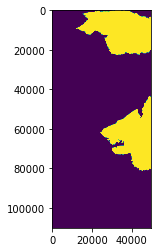

In [15]:
plt.imshow(mask[:,:50000])

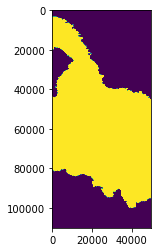

In [16]:
plt.imshow(mask[:,50000:100000])

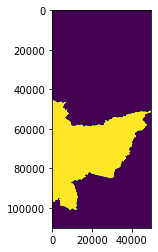

In [18]:
plt.imshow(mask[:,100000:])

In [12]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
import geopandas as gpd
from glob import glob

In [11]:
gpd=gpd.read_file('/ssd/hk/cen_samples/2019全国行政区划/市.shp')

In [14]:
gpd[gpd.市=='沈阳市']

,省代码,省,市代码,市,类型,geometry
37,210000,辽宁省,210100,沈阳市,副省级市,"POLYGON ((123.48611 43.02533, 123.48622 43.025..."


In [15]:
gpd[gpd.市=='齐齐哈尔市']

,省代码,省,市代码,市,类型,geometry
61,230000,黑龙江省,230200,齐齐哈尔市,地级市,"POLYGON ((124.81547 48.92994, 124.81812 48.929..."


In [16]:
gpd[gpd.市=='松原市']

,省代码,省,市代码,市,类型,geometry
57,220000,吉林省,220700,松原市,地级市,"POLYGON ((124.94887 45.49357, 124.96325 45.492..."


In [22]:
city=['沈阳市','齐齐哈尔市','松原市']
ids=['senyang','qqhe','songyuan']
for i in range(3):
    p=gpd[gpd.市==city[i]]
    p=p.rename(columns={'省代码': 'id','省':'province','类型':'class','市代码':'city_id','市':'city'})
    p.to_file(f'/ssd/hk/cen_samples/2019全国行政区划/{ids[i]}.shp')

In [18]:
p

,省代码,省,市代码,市,类型,geometry
57,220000,吉林省,220700,松原市,地级市,"POLYGON ((124.94887 45.49357, 124.96325 45.492..."


In [19]:
p=p.rename(columns={'省代码': 'id','省':'province','类型':'class','市代码':'city_id','市':'city'})

In [20]:
p

,id,province,city_id,city,class,geometry
57,220000,吉林省,220700,松原市,地级市,"POLYGON ((124.94887 45.49357, 124.96325 45.492..."


In [43]:
# resample(input_path,output_path,to_pixel_size)
for i in range(3):
    p=f'/ssd/hk/cen_samples/{ids[i]}.tif'
    print(p)
    resample(p,p.replace('.tif','_10m.tif'),0.0001)

/ssd/hk/cen_samples/senyang.tif
重采样完成： /ssd/hk/cen_samples/senyang.tif
/ssd/hk/cen_samples/qqhe.tif
重采样完成： /ssd/hk/cen_samples/qqhe.tif
/ssd/hk/cen_samples/songyuan.tif
重采样完成： /ssd/hk/cen_samples/songyuan.tif


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fbee53a9990> >


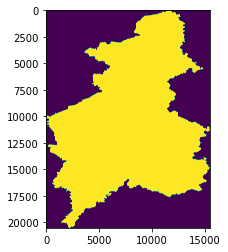

沈阳市
(20510, 15452)
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fbee5320c30> >


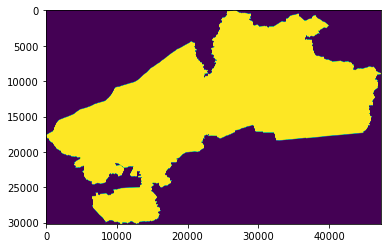

齐齐哈尔市
(30165, 47318)
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fbee4ec07e0> >


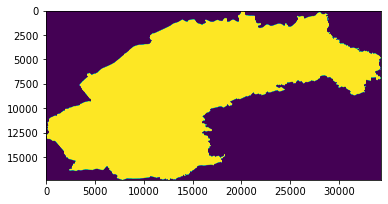

松原市
(17333, 34298)


In [34]:
for i in range(3):
    p=f'/ssd/hk/cen_samples/{ids[i]}.tif'
    ds=gdal.Open(p)
    trf=ds.GetGeoTransform()
    shape=(ds.RasterYSize,ds.RasterXSize)
    mask=get_mask(f'/ssd/hk/cen_samples/2019全国行政区划/{ids[i]}.shp',trf,shape,p='4326')
    plt.imshow(mask)
    plt.show()
    print(city[i])
    print(mask.shape)

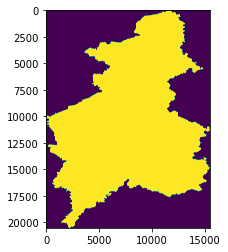

In [31]:
plt.imshow(mask)

In [29]:
ds=gdal.Open('/ssd/hk/cen_samples/senyang.tif')

In [32]:
mask.shape

(20510, 15452)

In [38]:
ds=gdal.Open('/ssd/hk/cen_samples/CEN_img/qqhe_2017_bandother.tif')
print(ds.GetGeoTransform())
ds=gdal.Open('/ssd/hk/cen_samples/CEN_img/qqhe_2018_bandother.tif')
print(ds.GetGeoTransform())

(122.41162713639895, 0.0002, 0.0, 48.930694536819864, 0.0, -0.0002)
(122.41162713639895, 0.0002, 0.0, 48.930694536819864, 0.0, -0.0002)


In [46]:
ds=gdal.Open('/ssd/hk/cen_samples/CEN_img/qqhe_2017_band2348.tif')
print(ds.GetGeoTransform())
ds=gdal.Open('/ssd/hk/cen_samples/CEN_img/qqhe_2018_band2348.tif')
print(ds.GetGeoTransform())

(122.41171696792736, 0.0001, 0.0, 48.930694536819864, 0.0, -0.0001)
(122.41171696792736, 0.0001, 0.0, 48.930694536819864, 0.0, -0.0001)


In [ ]:
tif_save(img,save_name,trf,p='4326')

In [4]:
import gdal
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio import crs
import os
from glob import glob
import gdal
import osr
from pybob.image_tools import create_mask_from_shapefile
from pybob.GeoImg import GeoImg
from tqdm.notebook import tqdm
import xarray as xr
import time
import gc
from rasterio import crs
def resample(input_path,output_path,to_pixel_size):
    ds=gdal.Open(input_path)
    width=ds.RasterXSize
    height=ds.RasterYSize
    transform=ds.GetGeoTransform()
    width=int(width*transform[1]/to_pixel_size)
    height=int(height*transform[5]/(-to_pixel_size))
    band = ds.GetRasterBand(1)
    data = band.ReadAsArray(buf_xsize=width,buf_ysize=height,resample_alg = gdal.GRIORA_NearestNeighbour)
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(output_path,
                                   width,height,6,gdal.GDT_Float32,['COMPRESS=LZW','BIGTIFF=YES'])
    transform_new=(transform[0],to_pixel_size,transform[2],transform[3],transform[4],-to_pixel_size)
    new_img.SetGeoTransform(transform_new)
    new_img.SetProjection(ds.GetProjection())
    for i in range(1,8):
        new_img.GetRasterBand(i).SetNoDataValue(0)
        new_img.GetRasterBand(i).WriteArray(data)
    new_img.FlushCache()
    print('重采样完成：',input_path)
    del ds
    del new_img
    del data
def tif_save(img,save_name,trf,p='4326'):
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(save_name,img.shape[1],img.shape[0],1,1,['COMPRESS=LZW','BIGTIFF=YES'])
    new_img.SetGeoTransform(trf)
    
    if p=='4326':
        sref = osr.SpatialReference()
        sref.ImportFromEPSG(4326)
        proj = sref.ExportToWkt()
    else:
        proj=p
    new_img.SetProjection(proj)
    new_img.GetRasterBand(1).SetNoDataValue(0)
    new_img.GetRasterBand(1).WriteArray(img)
    new_img.FlushCache()
    del new_img


In [17]:
ds=gdal.Open('/ssd/hk/cen_samples/CEN_img/senyang_2018_bandother_noresample.tif')
img=ds.ReadAsArray()
print(img.shape)

(6, 10255, 7727)


In [27]:
for city in ['qqhe','senyang','songyuan']:
    print(city)
    for year in ['2017','2018','2019']:
        print(year)
        p=f'/ssd/hk/cen_samples/{city}_{year}.tif'
        if not os.path.exists(p):
            print(p)
        resample(p,p.replace('.tif','_10m.tif'),0.0001)

qqhe
2017
重采样完成： /ssd/hk/cen_samples/qqhe_2017.tif
2018
重采样完成： /ssd/hk/cen_samples/qqhe_2018.tif
2019
重采样完成： /ssd/hk/cen_samples/qqhe_2019.tif
senyang
2017
重采样完成： /ssd/hk/cen_samples/senyang_2017.tif
2018
重采样完成： /ssd/hk/cen_samples/senyang_2018.tif
2019
重采样完成： /ssd/hk/cen_samples/senyang_2019.tif
songyuan
2017
重采样完成： /ssd/hk/cen_samples/songyuan_2017.tif
2018
重采样完成： /ssd/hk/cen_samples/songyuan_2018.tif
2019
重采样完成： /ssd/hk/cen_samples/songyuan_2019.tif


In [18]:
for city in ['qqhe','senyang','songyuan']:
    print(city)
    for year in ['2017','2018','2019']:
        print(year)
        p=f'/ssd/hk/cen_samples/{city}_{year}_10m.tif'
        ds=gdal.Open(p)
        img=ds.ReadAsArray()
        trf=ds.GetGeoTransform()
        # print(ds.GetGeoTransform())
        print(p)
        print(ds.GetGeoTransform())
        print(img.shape)
        # plt.imshow(img)
        # plt.show()
        print('rice')
        rice=np.zeros(img.shape)
        rice[img==0]=1
        tif_save(rice,p.replace('10m','rice_10m'),trf,p='4326')
        # plt.imshow(rice)
        # plt.show()
        print('maize')
        maize=np.zeros(img.shape)
        maize[img==1]=1
        tif_save(maize,p.replace('10m','maize_10m'),trf,p='4326')
        # plt.imshow(maize)
        # plt.show()
        print('soy')
        soy=np.zeros(img.shape)
        soy[img==2]=1
        tif_save(soy,p.replace('10m','soy_10m'),trf,p='4326')
        # plt.imshow(soy)
        # plt.show()
        print('other')
        other=np.zeros(img.shape)
        other[img==3]=1
        tif_save(other,p.replace('10m','other_10m'),trf,p='4326')
        # plt.imshow(other)
        # plt.show()

qqhe
2017
/ssd/hk/cen_samples/qqhe_2017_10m.tif
(122.4117485, 0.0001, 0.0, 48.93067559, 0.0, -0.0001)
(27097, 42507)
rice
maize
soy
other
2018
/ssd/hk/cen_samples/qqhe_2018_10m.tif
(122.4117485, 0.0001, 0.0, 48.93067559, 0.0, -0.0001)
(27097, 42507)
rice
maize
soy
other
2019
/ssd/hk/cen_samples/qqhe_2019_10m.tif
(122.4117485, 0.0001, 0.0, 48.93067559, 0.0, -0.0001)
(27097, 42507)
rice
maize
soy
other
senyang
2017
/ssd/hk/cen_samples/senyang_2017_10m.tif
(122.42037233, 0.0001, 0.0, 43.04024261, 0.0, -0.0001)
(18424, 13881)
rice
maize
soy
other
2018
/ssd/hk/cen_samples/senyang_2018_10m.tif
(122.42037233, 0.0001, 0.0, 43.04024261, 0.0, -0.0001)
(18424, 13881)
rice
maize
soy
other
2019
/ssd/hk/cen_samples/senyang_2019_10m.tif
(122.42037233, 0.0001, 0.0, 43.04024261, 0.0, -0.0001)
(18424, 13881)
rice
maize
soy
other
songyuan
2017
/ssd/hk/cen_samples/songyuan_2017_10m.tif
(123.10812251, 0.0001, 0.0, 45.53989472, 0.0, -0.0001)
(15571, 30811)
rice
maize
soy
other
2018
/ssd/hk/cen_samples/songy

In [10]:
for city in ['qqhe','senyang','songyuan']:
    print(city)
    for band in ['band2348']:
        print(band)
        for year in ['2017','2018','2019']:

            p=f'/ssd/hk/cen_samples/CEN_img/{city}_{year}_{band}.tif'
            ds=gdal.Open(p)
            print(ds.GetGeoTransform())
    for year in ['2017','2018','2019']:
        p=f'/ssd/hk/cen_samples/{city}_{year}_10m.tif'
        ds=gdal.Open(p)
        print(ds.GetGeoTransform())

qqhe
band2348
(122.41171696792736, 0.0001, 0.0, 48.930694536819864, 0.0, -0.0001)
(122.41171696792736, 0.0001, 0.0, 48.930694536819864, 0.0, -0.0001)
(122.41171696792736, 0.0001, 0.0, 48.930694536819864, 0.0, -0.0001)
(122.4117485, 0.0001, 0.0, 48.93067559, 0.0, -0.0001)
(122.4117485, 0.0001, 0.0, 48.93067559, 0.0, -0.0001)
(122.4117485, 0.0001, 0.0, 48.93067559, 0.0, -0.0001)
senyang
band2348
(122.42034079465492, 0.0001, 0.0, 43.04026155579134, 0.0, -0.0001)
(122.42034079465492, 0.0001, 0.0, 43.04026155579134, 0.0, -0.0001)
(122.42034079465492, 0.0001, 0.0, 43.04026155579134, 0.0, -0.0001)
(122.42037233, 0.0001, 0.0, 43.04024261, 0.0, -0.0001)
(122.42037233, 0.0001, 0.0, 43.04024261, 0.0, -0.0001)
(122.42037233, 0.0001, 0.0, 43.04024261, 0.0, -0.0001)
songyuan
band2348
(123.10809097617683, 0.0001, 0.0, 45.539913665382315, 0.0, -0.0001)
(123.10809097617683, 0.0001, 0.0, 45.539913665382315, 0.0, -0.0001)
(123.10809097617683, 0.0001, 0.0, 45.539913665382315, 0.0, -0.0001)
(123.10812251, 

In [17]:
for city in ['qqhe','senyang','songyuan']:
    print(city)
    year='2017'
    for band in ['band2348','bandother']:
        print(band)

        p=f'/ssd/hk/cen_samples/CEN_img/{city}_{year}_{band}.tif'
        ds=gdal.Open(p)
        print(ds.GetGeoTransform())
        t1=ds.GetGeoTransform()



qqhe
band2348
(122.41171696792736, 0.0001, 0.0, 48.930694536819864, 0.0, -0.0001)
bandother
(122.41162713639895, 0.0002, 0.0, 48.930694536819864, 0.0, -0.0002)
senyang
band2348
(122.42034079465492, 0.0001, 0.0, 43.04026155579134, 0.0, -0.0001)
bandother
(122.4202509631265, 0.0002, 0.0, 43.04026155579134, 0.0, -0.0002)
songyuan
band2348
(123.10809097617683, 0.0001, 0.0, 45.539913665382315, 0.0, -0.0001)
bandother
(123.10800114464841, 0.0002, 0.0, 45.539913665382315, 0.0, -0.0002)


In [15]:
for city in ['songyuan']:
    for year in ['2017','2018','2019']:
        p=f'/ssd/hk/cen_samples/{city}_{year}_10m.tif'
        ds=gdal.Open(p)
        trf=ds.GetGeoTransform()
        trf_new=(trf[0],trf[1],trf[2],trf[3],trf[4],trf[5])
        img=ds.ReadAsArray()
        print(img.shape)
        # img=img[:,1:]
        img=np.pad(img,((0,1),(0,0)),'constant',constant_values = (3,3))
        print(img.shape)
        tif_save(img,p,trf_new,p='4326')
        # print(ds.GetGeoTransform())
        # t2=ds.GetGeoTransform()
        # print((t1[0]-t2[0])/0.00005,(t2[3]-t1[3])/0.00005)


(15570, 30811)
(15571, 30811)
(15570, 30811)
(15571, 30811)
(15570, 30811)
(15571, 30811)


In [16]:
for city in ['qqhe','senyang','songyuan']:
    print(city)
    for band in ['band2348']:
        print(band)
        for year in ['2017','2018','2019']:

            p=f'/ssd/hk/cen_samples/CEN_img/{city}_{year}_{band}.tif'
            ds=gdal.Open(p)
            # print(ds.GetGeoTransform())
            print(ds.RasterXSize,ds.RasterYSize)
    for year in ['2017','2018','2019']:
        p=f'/ssd/hk/cen_samples/{city}_{year}_10m.tif'
        ds=gdal.Open(p)
        # print(ds.GetGeoTransform())
        print(ds.RasterXSize,ds.RasterYSize)

qqhe
band2348
42507 27097
42507 27097
42507 27097
42507 27097
42507 27097
42507 27097
senyang
band2348
13881 18424
13881 18424
13881 18424
13881 18424
13881 18424
13881 18424
songyuan
band2348
30811 15571
30811 15571
30811 15571
30811 15571
30811 15571
30811 15571


In [22]:
for city in ['qqhe','senyang','songyuan']:
    for band in ['band2348','bandother']:
        for year in ['2017','2018','2019']:

            p=f'/ssd/hk/cen_samples/CEN_img/{city}_{year}_{band}.tif'
            if not os.path.exists(p):
                print(p)
                raise
            ds=gdal.Open(p)
            print(ds.RasterXSize,ds.RasterYSize)

42507 27097
42507 27097
42507 27097
21254 13549
21254 13549
21254 13549
13881 18424
13881 18424
13881 18424
6941 9212
6941 9212
6941 9212
30811 15571
30811 15571
30811 15571
15406 7785
15406 7785
15406 7785


In [1]:
import geopandas as gpd


In [5]:
f=gpd.read_file('/ssd/hk/fire/shp/modis.ba.poly.shp')

In [9]:
f=f[f['FIREDATE']>'2019']

In [13]:
f=f[f['FIREDATE']<'2022']

In [19]:
IT=f[f['COUNTRY']=='IT']

In [54]:
IT.to_file('/ssd/hk/fire/shp/IT_2019-2021.shp')

In [42]:
geo=list(IT['geometry'])

In [53]:
IT['x']=[list(list(i.centroid.coords)[0])[0] for i in geo]
IT['y']=[list(list(i.centroid.coords)[0])[1] for i in geo]

/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [52]:
del IT['center']

In [56]:
IT

,id,FIREDATE,LASTUPDATE,COUNTRY,PROVINCE,COMMUNE,AREA_HA,BROADLEA,CONIFER,MIXED,...,TRANSIT,OTHERNATLC,AGRIAREAS,ARTIFSURF,OTHERLC,PERCNA2K,CLASS,geometry,x,y
27886,15070,2019-07-13 00:00:00,2019-07-14 00:00:00,IT,Ogliastra,Tortolì,625,5.696202531644668,0,0,...,0,0,31.803797468349398,0,0,28.40246489596559,FireSeason,"POLYGON ((9.66558 39.91486, 9.66565 39.91486, ...",9.666226,39.900822
27896,15143,2019-07-10 00:00:00,2019-07-10 00:00:00,IT,Palermo,Palermo,74,0,10.810810810796202,0,...,78.37837837827246,0,0,10.810810810796202,0,0,FireSeason,"POLYGON ((13.28490 38.13478, 13.28478 38.13470...",13.285422,38.136296
27915,15210,2019-07-25 00:00:00,2019-07-25 00:00:00,IT,Latina,Fondi,48,0,0,0,...,99.9999999997826,0,0,0,0,100.00000000000004,FireSeason,"POLYGON ((13.40555 41.39190, 13.40561 41.39188...",13.402297,41.387980
27936,15237,2019-06-20 00:00:00,2019-06-20 00:00:00,IT,Siracusa,Avola,21,0,0,0,...,90.47619047575964,0,9.523809523764173,0,0,0,FireSeason,"POLYGON ((15.15042 36.94715, 15.15046 36.94710...",15.147053,36.947162
27937,15238,2019-02-28 00:00:00,2019-02-28 00:00:00,IT,Benevento,Pietraroja,25,0,0,0,...,99.9999999996,0,0,0,0,100.00000000000004,FireSeason,"POLYGON ((14.60617 41.34028, 14.60622 41.34024...",14.604207,41.337994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45705,51349,2021-07-30 12:06:00,2021-07-31 12:38:00,IT,Caserta,Sessa Aurunca,111,52.67857142852439,0,0,...,47.32142857138632,0,0,0,0,100,FireSeason,"POLYGON ((13.93212 41.29162, 13.93312 41.29291...",13.937746,41.289597
45715,51749,2021-07-26 12:29:00,2021-07-26 13:40:00,IT,Siracusa,Noto,14,0,0,0,...,0,0,33.333333333111106,0,0,0,FireSeason,"POLYGON ((14.96908 36.84560, 14.96946 36.84559...",14.972481,36.843742
45729,51905,2021-07-30 12:05:00,2021-08-04 01:05:00,IT,Reggio di Calabria,Motta San Giovanni,163,0,0,0,...,62.1951219511816,12.195121951212078,25.60975609754536,0,0,0,FireSeason,"POLYGON ((15.70934 38.03683, 15.70917 38.03695...",15.718107,38.036034
45740,54117,2021-08-22 00:01:00,2021-08-23 12:57:00,IT,Chieti,Tornareccio,750,0,0,0,...,10.533333333331928,0,89.46666666665473,0,0,0,FireSeason,"POLYGON ((14.45795 42.02159, 14.45812 42.02157...",14.443450,42.016232


In [66]:
from glob import glob
import shutil
import os
from tqdm import tqdm

In [72]:
for i in tqdm(glob('/ssd/hk/cen_samples/CEN_img/*.npy')):
    shutil.move(i,i.replace('/ssd/hk/cen_samples/CEN_img/','/data4/CEN/img_10m/'))

100%|██████████| 18/18 [13:45<00:00, 45.85s/it]


In [73]:
for i in tqdm(glob('/ssd/hk/cen_samples/CEN_img/*.pth')):
    shutil.move(i,i.replace('/ssd/hk/cen_samples/CEN_img/','/data4/CEN/img_10m/'))

100%|██████████| 18/18 [00:00<00:00, 2706.97it/s]


In [2]:
import torch
t=torch.load('/ssd/hk/USA_samples/split_v2/train.pth')
v=torch.load('/ssd/hk/USA_samples/split_v2/val.pth')
print(len(t),len(v))
t=torch.load('/ssd/hk/USA_samples/split_v3/train.pth')
v=torch.load('/ssd/hk/USA_samples/split_v3/val.pth')
print(len(t),len(v))

91811 39351
11480 4920


In [4]:
import torch
t=torch.load('/ssd/hk/cen_samples/split_v2/train.pth')
v=torch.load('/ssd/hk/cen_samples/split_v2/val.pth')
print(len(t),len(v))
t=torch.load('/ssd/hk/cen_samples/split_v3/train.pth')
v=torch.load('/ssd/hk/cen_samples/split_v3/val.pth')
print(len(t),len(v))

125322 53706
41774 17902


In [22]:
import torch
import os
t=torch.load('/ssd/hk/USA_samples/split_v2/train.pth')
v=torch.load('/ssd/hk/USA_samples/split_v2/val.pth')
print(len(v))

39351


In [2]:
a=os.listdir('/ssd/hk/USA_samples_seg/img/samples_seg/img/')
a[0]

FileNotFoundError: [Errno 2] No such file or directory: '/ssd/hk/USA_samples_seg/img/samples_seg/img/'

In [11]:
for i in t:
    p=i[0]
    p=p.replace('/samples/','/samples_seg/img/').replace('.npy','.tif')
    if not os.path.exists(p):
        print(p)

In [13]:
p

'/ssd/hk/USA_samples/samples_seg/img/2021_056075.tif'

In [8]:
os.path.basename(i[0])[:-4]

'2021_056075'

In [24]:
tt=[os.path.basename(i[0])[:-4] for i in t]
vv=[os.path.basename(i[0])[:-4] for i in v]



In [25]:
with open("/ssd/hk/USA_samples/samples_seg/train.txt","w") as f:
    for i in tt:
        f.write(i+'\n')

In [26]:
with open("/ssd/hk/USA_samples/samples_seg/val.txt","w") as f:
    for i in vv:
        f.write(i+'\n')

In [27]:
len(vv)

39351

In [36]:
p=os.listdir('/ssd/hk/USA_samples/samples_seg/img/')[0]
print(p)

2018_066007.tif


In [35]:
os.path.exists('/ssd/hk/USA_samples/samples_seg/label/'+p.replace('.tif','_label.tif'))

True

In [33]:
p.replace('/img/','/label/').replace('.tif','_label.tif')

'2018_066007_label.tif'

In [34]:
os.listdir('/ssd/hk/USA_samples/samples_seg/label/')[0]

'2020_048077_label.tif'

In [2]:
from glob import glob
t=[]
with open('/ssd/hk/USA_samples/samples_seg/train.txt') as f:
    for i in f:
        t.append(i.strip())

In [4]:
t=['/ssd/hk/USA_samples/samples_seg/img/'+i+'.tif' for i in t]

In [6]:
import random
random.shuffle(t)

In [37]:
t

[['/ssd/hk/USA_samples/samples/2014_054075.npy',
  '/ssd/hk/USA_samples/samples/2015_054075.npy',
  '/ssd/hk/USA_samples/samples/2016_054075.npy',
  '/ssd/hk/USA_samples/samples/2017_054075.npy',
  '/ssd/hk/USA_samples/samples/2018_054075.npy',
  '/ssd/hk/USA_samples/samples/2019_054075.npy',
  '/ssd/hk/USA_samples/samples/2020_054075.npy',
  '/ssd/hk/USA_samples/samples/2021_054075.npy',
  None],
 ['/ssd/hk/USA_samples/samples/2014_025032.npy',
  '/ssd/hk/USA_samples/samples/2015_025032.npy',
  '/ssd/hk/USA_samples/samples/2016_025032.npy',
  '/ssd/hk/USA_samples/samples/2017_025032.npy',
  '/ssd/hk/USA_samples/samples/2018_025032.npy',
  '/ssd/hk/USA_samples/samples/2019_025032.npy',
  '/ssd/hk/USA_samples/samples/2020_025032.npy',
  '/ssd/hk/USA_samples/samples/2021_025032.npy',
  None],
 ['/ssd/hk/USA_samples/samples/2014_067013.npy',
  '/ssd/hk/USA_samples/samples/2015_067013.npy',
  '/ssd/hk/USA_samples/samples/2016_067013.npy',
  '/ssd/hk/USA_samples/samples/2017_067013.npy',
  

In [43]:
import os
import torch
t=torch.load('/ssd/hk/USA_samples/split_v3/val.pth')
t=[i[0][:9] for i in t]
tt=[]
for i in t:
    k=[]
    for j in i:
        if j is not None:
            if not os.path.exists(j.replace('/samples/','/samples_seg/img/').replace('.npy','.tif')):
                print(i)
            else:
                k.append(j.replace('/samples/','/samples_seg/img/').replace('.npy','.tif'))
        else:
            k.append(None)
    tt.append(k)

In [29]:

for i in t:
    if not os.path.exists(i.replace('/samples/','/samples_seg/img/').replace('.npy','.tif')):
        print(i)
    else:
        tt.append(i.replace('/samples/','/samples_seg/img/').replace('.npy','.tif'))
    

In [44]:
random.shuffle(tt)
torch.save(tt,'/ssd/hk/USA_samples/split_seg_v2/val.pth')

In [9]:
import gdal
import torch

In [5]:
torch.load('/ssd/hk/USA_samples/split_seg_v2/val.pth')[0]

'/ssd/hk/USA_samples/samples_seg/img/2019_021013.tif'

In [8]:
rasterio.open('/ssd/hk/USA_samples/samples_seg/img/2019_021013.tif').read(1).shape

/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(120, 120)

In [14]:
gdal.Open('/ssd/hk/USA_samples/samples_seg/img/2019_021013.tif'.replace('/img/','/label/').replace('.tif','_label.tif')).ReadAsArray().shape

(120, 120)

In [1]:
import numpy as np
warmup_steps = 2500
init_lr = 0.1  
# 模拟训练15000步
max_steps = 15000
for train_steps in range(max_steps):
    if warmup_steps and train_steps < warmup_steps:
        warmup_percent_done = train_steps / warmup_steps
        warmup_learning_rate = init_lr * warmup_percent_done  #gradual warmup_lr
        learning_rate = warmup_learning_rate
    else:
        #learning_rate = np.sin(learning_rate)  #预热学习率结束后,学习率呈sin衰减
        learning_rate = learning_rate**1.0001


In [21]:
def get_lr(train_steps,warmup_steps=1500,warmup_ratio=1e-6,mxa_steps=15000,power=1):
    if warmup_steps and train_steps < warmup_steps:
        # warmup_percent_done = train_steps / warmup_steps
        warmup_learning_rate = warmup_ratio * train_steps  #gradual warmup_lr
        learning_rate = warmup_learning_rate
    else:
        #learning_rate = np.sin(learning_rate)  #预热学习率结束后,学习率呈sin衰减
        learning_rate = (warmup_steps*warmup_ratio) * (1-(train_steps-warmup_steps)/(mxa_steps-warmup_steps))**power
    if train_steps>max_steps:
        print("train_steps:%.3f--warmup_steps:%.3f--learning_rate:%.3f" % (
                train_steps+1,warmup_steps,learning_rate))
    return learning_rate

In [24]:
lrs=[]
for i in range(15000):
    lrs.append(get_lr(i))
import matplotlib.pyplot as plt


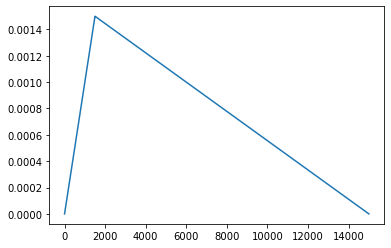

In [25]:
plt.plot(lrs)

In [ ]:
def adjust_learning_rate_poly(optimizer, epoch, num_epochs, base_lr, power)
    lr = base_lr * (1-epoch/num_epochs)**power
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr


In [1]:
import torch
ckpt=torch.load('/home/hk/python_script/Ukraine/checkpoints/试一试_mynet6size120mtc1v2_Syria_size120_HamaandRaqqaall_effectweight_v3_multi-time_RandomDelandCopyv2_3/last_ckpt.pt')

In [9]:
del ckpt['model_state_dict']['module.hand.0.bias']

In [10]:
torch.save(ckpt,'/home/hk/python_script/Ukraine/checkpoints/试一试_mynet6size120mtc1v2_Syria_size120_HamaandRaqqaall_effectweight_v3_multi-time_RandomDelandCopyv2_3/last_ckpt.pt')

In [13]:
ckpt['optimizer_G_state_dict'].keys()

dict_keys(['state', 'param_groups'])

In [1]:
import geopandas as gpd
from glob import glob
f=gpd.read_file('/data4/Ukraine_img/UKR_adm2.shp')

In [2]:
f['VARNAME_2']

0        Mariupol
1    Novoazovskyi
Name: VARNAME_2, dtype: object

In [5]:

f=f[f.VARNAME_2=='Mariupol']

In [7]:
f.to_file('/data4/Ukraine_img/Mariupol.shp')

In [11]:
f=gpd.read_file('/data4/Ukraine_img/Mariupol.shp')

In [18]:
f2=gpd.read_file('/home/hk/python_script/Ukraine/data/UNOSAT/U/UNOSAT_Mariupol_Livoberezhyny_AOI_12May2022.shp')

In [45]:
f2=f2.to_crs(4326)

<AxesSubplot:>

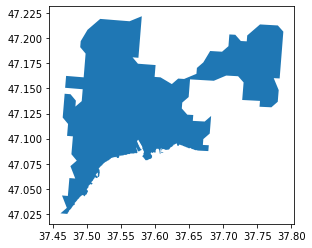

In [10]:
f.plot()

In [22]:
f['geometry']

0    POLYGON ((37.53959 47.08153, 37.53959 47.08125...
Name: geometry, dtype: geometry

In [46]:
d={'name':['Mariupol','area1','area2'],'geometry':[f.loc[0]['geometry'],f2.loc[0]['geometry'],f2.loc[1]['geometry']]}

In [47]:
f3=gpd.GeoDataFrame.from_dict(d)

In [60]:
f3.to_file('/home/hk/python_script/Ukraine/data/UNOSAT/U/Mariupol_and_Livoberezhyny.shp')

<AxesSubplot:>

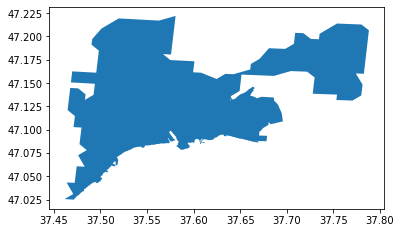

In [50]:
f3.plot()

In [38]:
f

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,240,UKR,Ukraine,6,Donets'k,137,Mariupol's'ka,Mis'ka Rada,Mis'ka Rada,None,Mariupol,"POLYGON ((37.53959 47.08153, 37.53959 47.08125..."


In [57]:
f3=f3.dissolve(by='country')

In [54]:
f3['country']=['Ukraine']*3

In [55]:
f3

,name,geometry,country
0,Mariupol,"POLYGON ((37.53959 47.08153, 37.53959 47.08125...",Ukraine
1,area1,"POLYGON ((37.66609 47.13485, 37.66791 47.13361...",Ukraine
2,area2,"POLYGON ((37.57232 47.10113, 37.57179 47.10039...",Ukraine


<AxesSubplot:>

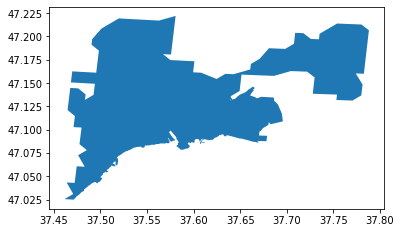

In [59]:
f3.plot()

In [95]:
from glob import glob
f=glob('/data4/Ukraine_img/U_band2348/*cut_reprojection_size_6_area1_info.pth')

In [96]:
len(f)

43

In [72]:
import os
for i in f:
    if not os.path.exists(i.replace('CN','DN')):
        print(i)

/data4/Ukraine_img/U_band2348/20220227T082911_20220227T083303_T37TCN_cut_reprojection_size_6_area1_info.pth
/data4/Ukraine_img/U_band2348/20210910T082601_20210910T083119_T37TCN_cut_reprojection_size_6_area1_info.pth


In [92]:
len(f)

22

In [91]:
f2=glob('/data4/Ukraine_img/M/*')
len(f2)

43

In [89]:
empty=[]
for i in f2:
    if not os.path.exists(i.replace('M/','U_band2348/').replace('.tif','_cut_reprojection_size_6_area1_info.pth')):
        empty.append(i)
        print(i)

/data4/Ukraine_img/M/20220423T082559_20220423T083443_T37TDN.tif
/data4/Ukraine_img/M/20220217T083021_20220217T083302_T37TCN.tif
/data4/Ukraine_img/M/20220413T082559_20220413T082558_T37TCN.tif
/data4/Ukraine_img/M/20210910T082601_20210910T083119_T37TDN.tif
/data4/Ukraine_img/M/20220408T082601_20220408T083258_T37TCN.tif
/data4/Ukraine_img/M/20220518T082611_20220518T083544_T37TDN.tif
/data4/Ukraine_img/M/20220413T082559_20220413T082558_T37TDN.tif
/data4/Ukraine_img/M/20220423T082559_20220423T083443_T37TCN.tif
/data4/Ukraine_img/M/20220304T082739_20220304T083151_T37TDN.tif
/data4/Ukraine_img/M/20220217T083021_20220217T083302_T37TDN.tif
/data4/Ukraine_img/M/20220304T082739_20220304T083151_T37TCN.tif
/data4/Ukraine_img/M/20220518T082611_20220518T083544_T37TCN.tif
/data4/Ukraine_img/M/20220227T082911_20220227T083303_T37TDN.tif


In [5]:
import os
os.listdir('/data4/Ukraine_img/')

['Mariupol.cpg',
 'U_bandother',
 'UKR_adm2.sbx',
 'ESRI_Global-LULC_10m.tif',
 'UKR_adm2.csv',
 'U_band2348',
 'Sievierodoetsk',
 'UKR_adm2.prj',
 'frequence.tif',
 'ESRI_Global-LULC_10m_patch_info.pth',
 'UKR_adm2.shx',
 'Mariupol.dbf',
 'Mariupol.prj',
 'Mariupol.shp',
 'M_and_L',
 'UKR_adm2.shp',
 'frequence2.tif',
 'Mariupol.shx',
 'UKR_adm2.cpg',
 'UKR_adm2.dbf',
 'Rubizhne',
 'M_and_L_inference',
 'UKR_adm2.sbn']

In [43]:
cs=['Sievierodoetsk','Rubizhne']
sl=glob('/data4/Ukraine_img/Rubizhne/*')
sl.sort()
sl

['/data4/Ukraine_img/Rubizhne/20210910T082601_20210910T083119_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220319T082651_20220319T083304_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220324T082609_20220324T083426_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220329T082601_20220329T083216_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220423T082559_20220423T083443_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220503T082559_20220503T083512_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220508T082611_20220508T083304_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220523T082559_20220523T082946_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220612T082609_20220612T082840_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220617T082611_20220617T083253_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220627T082621_20220627T083534_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220702T082609_20220702T082835_T37UDQ.tif',
 '/data4/Ukraine_img/Rubizhne/20220707T082621_20220707T083621_T37UDQ.tif',
 '/data4/Ukraine_img/Rubi

In [42]:
for i in sl:
    os.rename(i,i.replace('_2.tif','.tif'))

In [33]:
glob('/data4/Ukraine_img/Sievierodoetsk/*.tif')

['/data4/Ukraine_img/Sievierodoetsk/20220513T082559_20220513T082940_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220702T082609_20220702T082835_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220806T082611_20220806T083525_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220920T082629_20220920T082835_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220717T082611_20220717T083526_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220309T082801_20220309T083304_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220319T082651_20220319T083304_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220627T082621_20220627T083534_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220707T082621_20220707T083621_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220910T082609_20220910T082839_T37UDQ.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20220811T082609_20220811T083202_T37UDQ_2.tif',
 '/data4/Ukraine_img/Sievierodoetsk/20210910T082601_20210910T083119_T37UDQ.tif',
 '/data4/Ukraine_img/Sievi

In [88]:
for i in empty:
    os.remove(i)

In [3]:
from glob import glob
glob('/home/hk/python_script/Ukraine/data/UNOSAT/Kharkiv_0424/*.shp')

['/home/hk/python_script/Ukraine/data/UNOSAT/Kharkiv_0424/Kharikiv_boundary.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/Kharkiv_0424/Kharkiv_10220615.shp']

In [4]:
import geopandas as gpd

,OBJECTID,SiteID,SensorDate,SensorID,Confidence,Main_Damag,SensorDa_1,SensorID_2,Confiden_1,Main_Dam_1,...,Damage_S_4,Grouped_Da,FieldValid,Notes,Settlement,Neighborho,EventCode,Analyst,Main_Dam_5,geometry
0,2,26,2022-04-24,2,1,3,2022-06-15,2,1,3,...,0,1,0,None,Kharkiv,<Null>,CE20220223UKR,218,0,POINT (4043904.748 6456838.018)
1,3,26,2022-04-24,2,1,2,2022-06-15,2,1,2,...,0,1,0,None,Kharkiv,None,CE20220223UKR,218,0,POINT (4043947.027 6456851.270)
2,5,26,2022-04-24,2,1,3,2022-06-15,2,1,3,...,0,1,0,None,Kharkiv,None,CE20220223UKR,218,0,POINT (4047434.801 6455749.285)
3,6,26,2022-04-24,2,1,2,2022-06-15,2,1,2,...,0,1,0,None,Kharkiv,None,CE20220223UKR,218,0,POINT (4047357.206 6455871.699)
4,7,26,2022-04-24,2,1,1,2022-06-15,2,1,1,...,0,1,0,None,Kharkiv,None,CE20220223UKR,218,0,POINT (4047305.016 6455844.601)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,966,26,None,0,0,0,2022-06-15,2,0,3,...,0,0,0,None,None,None,None,0,0,POINT (4045522.024 6453292.670)
890,967,26,None,0,0,0,2022-06-15,2,1,2,...,0,0,0,None,None,None,None,0,0,POINT (4045555.758 6453185.513)
891,968,26,None,0,0,0,2022-06-15,2,1,1,...,0,0,0,None,None,None,None,0,0,POINT (4045160.167 6453929.717)
892,969,26,None,0,0,0,2022-06-15,2,1,1,...,0,0,0,None,None,None,None,0,0,POINT (4039012.042 6455525.517)


/data4/Ukraine_img/M/20210910T082601_20210910T083119_T37TCN.tif


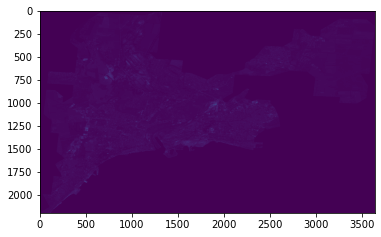

/data4/Ukraine_img/M/20220222T082839_20220222T082842_T37TCN.tif


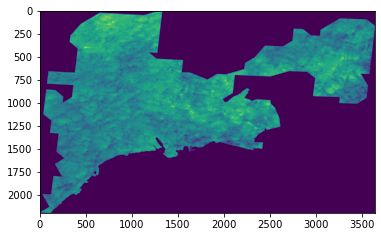

/data4/Ukraine_img/M/20220222T082839_20220222T082842_T37TDN.tif


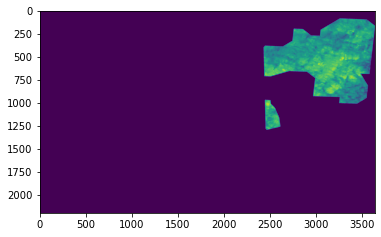

/data4/Ukraine_img/M/20220227T082911_20220227T083303_T37TCN.tif


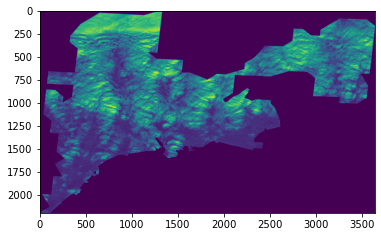

/data4/Ukraine_img/M/20220309T082801_20220309T083304_T37TCN.tif


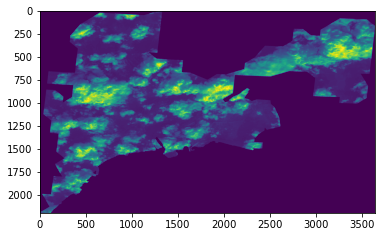

/data4/Ukraine_img/M/20220309T082801_20220309T083304_T37TDN.tif


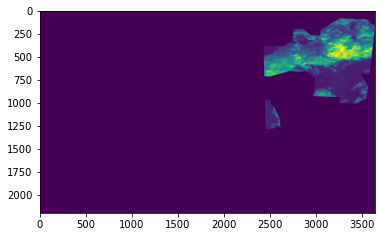

/data4/Ukraine_img/M/20220314T082719_20220314T083610_T37TCN.tif


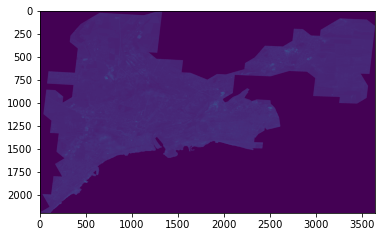

/data4/Ukraine_img/M/20220314T082719_20220314T083610_T37TDN.tif


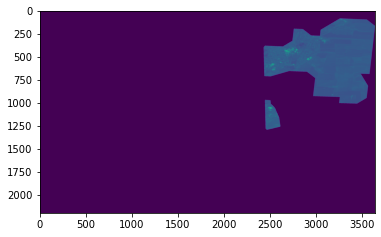

/data4/Ukraine_img/M/20220319T082651_20220319T083304_T37TCN.tif


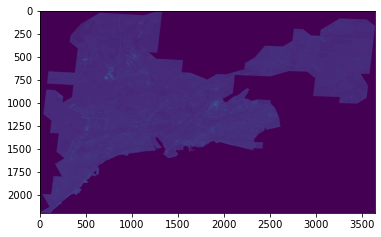

/data4/Ukraine_img/M/20220319T082651_20220319T083304_T37TDN.tif


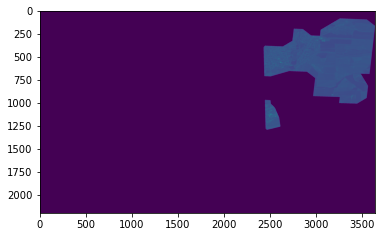

/data4/Ukraine_img/M/20220324T082609_20220324T083426_T37TCN.tif


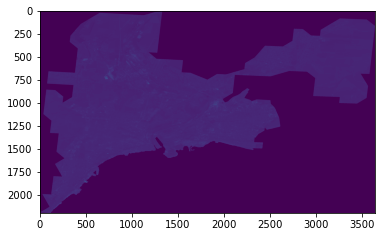

/data4/Ukraine_img/M/20220324T082609_20220324T083426_T37TDN.tif


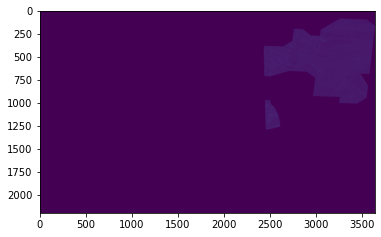

/data4/Ukraine_img/M/20220329T082601_20220329T083216_T37TCN.tif


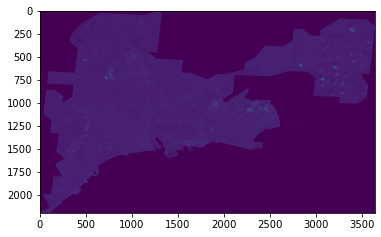

/data4/Ukraine_img/M/20220329T082601_20220329T083216_T37TDN.tif


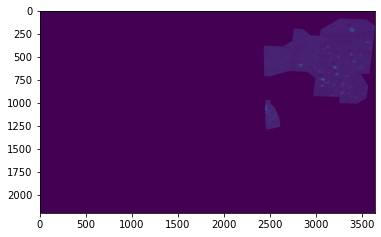

/data4/Ukraine_img/M/20220403T082559_20220403T083553_T37TCN.tif


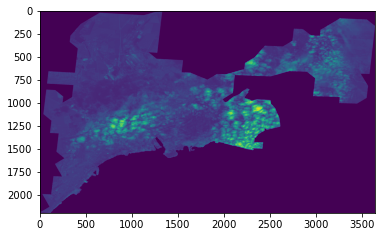

/data4/Ukraine_img/M/20220403T082559_20220403T083553_T37TDN.tif


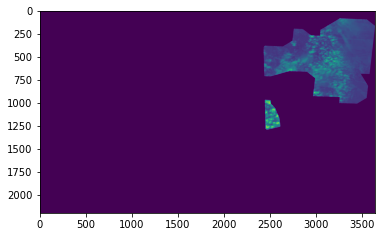

/data4/Ukraine_img/M/20220408T082601_20220408T083258_T37TDN.tif


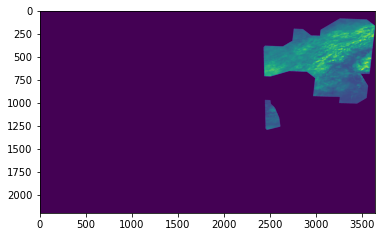

/data4/Ukraine_img/M/20220418T082611_20220418T083304_T37TCN.tif


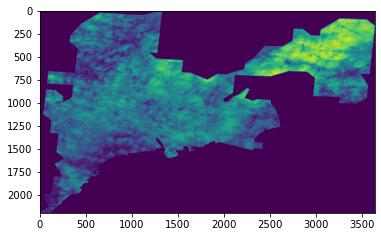

/data4/Ukraine_img/M/20220418T082611_20220418T083304_T37TDN.tif


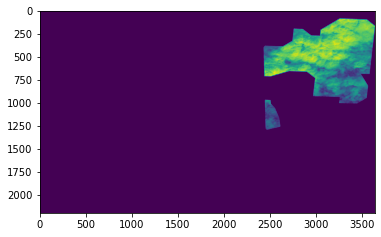

/data4/Ukraine_img/M/20220428T082611_20220428T083305_T37TCN.tif


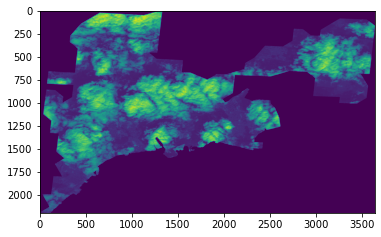

/data4/Ukraine_img/M/20220428T082611_20220428T083305_T37TDN.tif


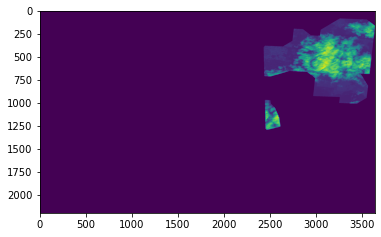

/data4/Ukraine_img/M/20220503T082559_20220503T083512_T37TCN.tif


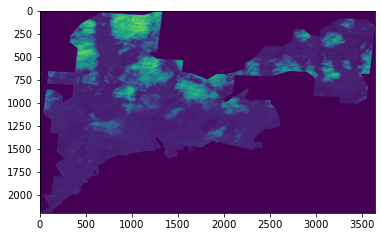

/data4/Ukraine_img/M/20220503T082559_20220503T083512_T37TDN.tif


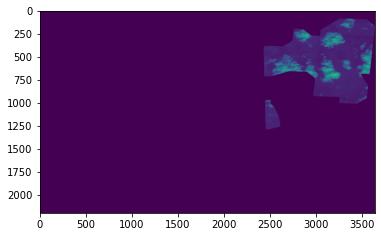

/data4/Ukraine_img/M/20220508T082611_20220508T083304_T37TCN.tif


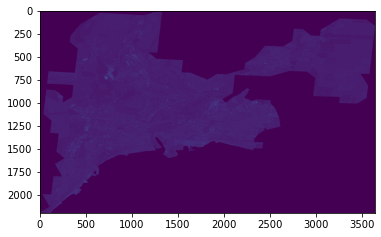

/data4/Ukraine_img/M/20220508T082611_20220508T083304_T37TDN.tif


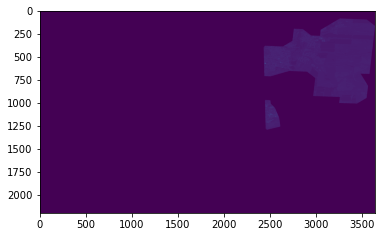

/data4/Ukraine_img/M/20220513T082559_20220513T082940_T37TCN.tif


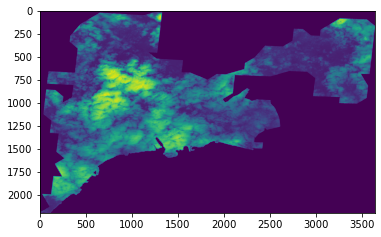

/data4/Ukraine_img/M/20220513T082559_20220513T082940_T37TDN.tif


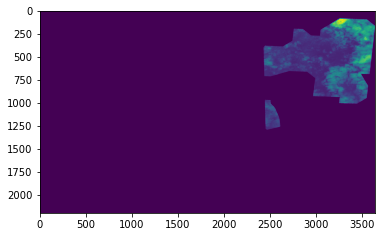

/data4/Ukraine_img/M/20220523T082559_20220523T082946_T37TCN.tif


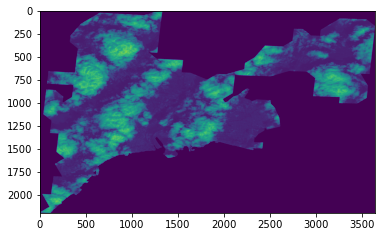

/data4/Ukraine_img/M/20220523T082559_20220523T082946_T37TDN.tif


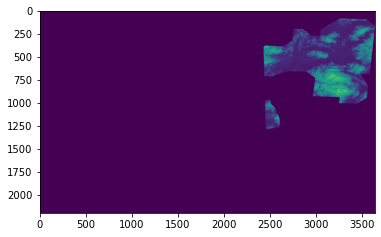

/data4/Ukraine_img/M/20220528T082611_20220528T083641_T37TCN.tif


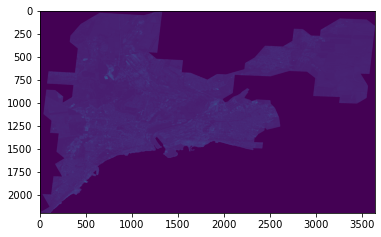

/data4/Ukraine_img/M/20220528T082611_20220528T083641_T37TDN.tif


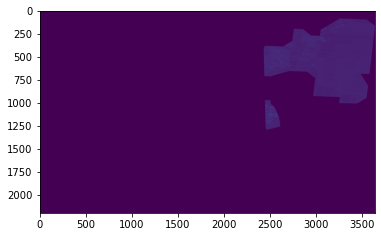

/data4/Ukraine_img/M/20220602T082559_20220602T082807_T37TCN.tif


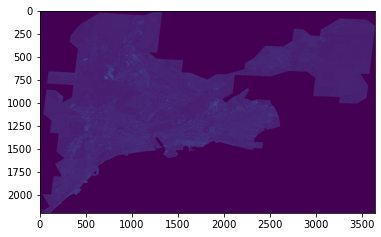

/data4/Ukraine_img/M/20220602T082559_20220602T082807_T37TDN.tif


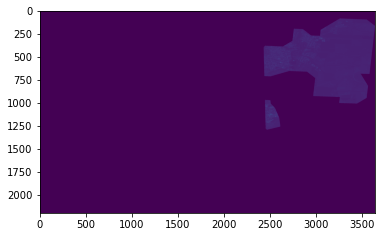

/data4/Ukraine_img/M/20220607T082611_20220607T083435_T37TCN.tif


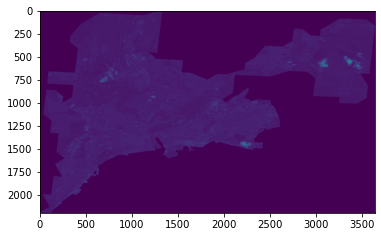

/data4/Ukraine_img/M/20220607T082611_20220607T083435_T37TDN.tif


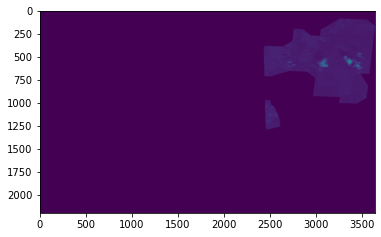

/data4/Ukraine_img/M/20220612T082609_20220612T082840_T37TCN.tif


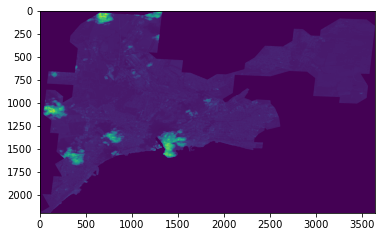

/data4/Ukraine_img/M/20220612T082609_20220612T082840_T37TDN.tif


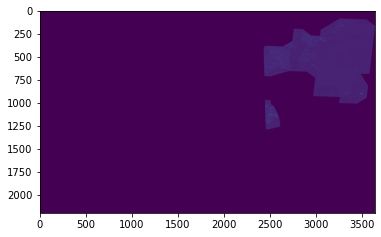

/data4/Ukraine_img/M/20220617T082611_20220617T083253_T37TCN.tif


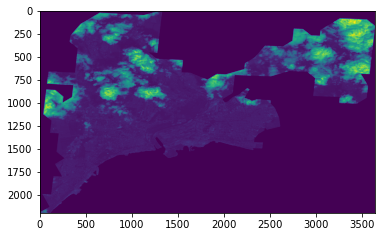

/data4/Ukraine_img/M/20220617T082611_20220617T083253_T37TDN.tif


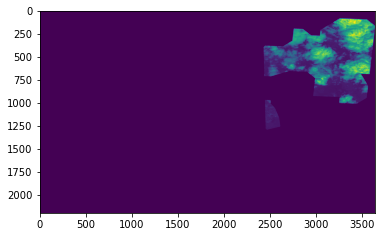

/data4/Ukraine_img/M/20220622T082609_20220622T082834_T37TCN.tif


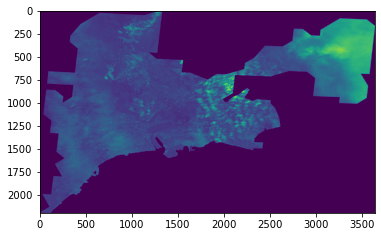

/data4/Ukraine_img/M/20220622T082609_20220622T082834_T37TDN.tif


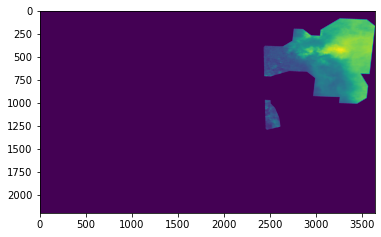

/data4/Ukraine_img/M/20220627T082621_20220627T083534_T37TCN.tif


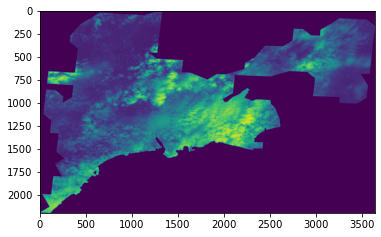

/data4/Ukraine_img/M/20220627T082621_20220627T083534_T37TDN.tif


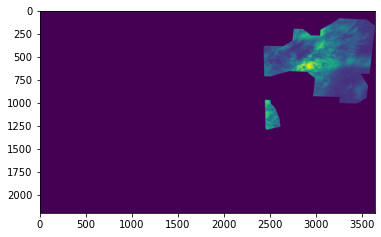

In [104]:
import rasterio
for i in f2:
    print(i)
    img=rasterio.open(i).read(1)
    plt.imshow(img)
    plt.show()
    # break

In [ ]:
'/data4/Ukraine_img/U_band2348/20220627T082621_20220627T083534_T37TCN_cut_reprojection.tif'

In [111]:
for i in f2:
    ds=gdal.Open(i.replace('/M/','/U_band2348/').replace('.tif','_cut_reprojection.tif'))
    print(ds.GetGeoTransform())

(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439751285558867, 0.0, 47.1535639548666, 0.0, -0.00012439751285558867)
(37.48306437338527, 0.00012439

In [112]:
import gdal
for i in f2:
    ds=gdal.Open(i)
    print(ds.GetGeoTransform())
    trf=ds.GetGeoTransform()

(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-05, 0.0, 47.22209886642453, 0.0, -8.983152841195215e-05)
(37.46136431529546, 8.983152841195215e-0

In [129]:
(trf[3]+0.00012439751285558867-0.00011627948735902049-47.1535639548666)%0.00012439751285558867

1.4813454282669447e-15

In [130]:
0.00012439751285558867-0.00011627948735902049

8.118025496568174e-06

In [125]:
((37.48306437338527-trf[0]-5.4890852933478984e-05)-0.00012439751285558867*174)*1e5

0.0

In [124]:
trf[0]+5.4890852933478984e-05

(2196, 3638)

In [131]:
new_trf=(trf[0]+5.4890852933478984e-05,trf[1],trf[2],trf[3]+8.118025496568174e-06,trf[4],trf[5])

In [316]:
def resample(input_path,output_path,to_pixel_size):
    ds=gdal.Open(input_path)
    width=ds.RasterXSize
    height=ds.RasterYSize
    # transform=ds.GetGeoTransform()
    transform=new_trf
    width=int(width*transform[1]/to_pixel_size)
    height=int(height*transform[5]/(-to_pixel_size))

    # print(data.shape)
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(output_path,
                                   width,height,10,gdal.GDT_Float32,['COMPRESS=LZW','BIGTIFF=YES'])
    transform_new=(transform[0],to_pixel_size,transform[2],transform[3],transform[4],-to_pixel_size)
    new_img.SetGeoTransform(transform_new)
    new_img.SetProjection(ds.GetProjection())
    for i in range(1,11):
        band = ds.GetRasterBand(i)
        data = band.ReadAsArray(buf_xsize=width,buf_ysize=height,resample_alg = gdal.GRIORA_NearestNeighbour)
        new_img.GetRasterBand(i).SetNoDataValue(0)
        new_img.GetRasterBand(i).WriteArray(data)
    new_img.FlushCache()
    print('重采样完成：',input_path)
    del ds
    del new_img
    del data

In [317]:
for i in f2:
    resample(i,i.replace('.tif','_resample.tif'),0.00012439751285558867)

重采样完成： /data4/Ukraine_img/M/20210910T082601_20210910T083119_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220222T082839_20220222T082842_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220222T082839_20220222T082842_T37TDN.tif
重采样完成： /data4/Ukraine_img/M/20220227T082911_20220227T083303_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220309T082801_20220309T083304_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220309T082801_20220309T083304_T37TDN.tif
重采样完成： /data4/Ukraine_img/M/20220314T082719_20220314T083610_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220314T082719_20220314T083610_T37TDN.tif
重采样完成： /data4/Ukraine_img/M/20220319T082651_20220319T083304_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220319T082651_20220319T083304_T37TDN.tif
重采样完成： /data4/Ukraine_img/M/20220324T082609_20220324T083426_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220324T082609_20220324T083426_T37TDN.tif
重采样完成： /data4/Ukraine_img/M/20220329T082601_20220329T083216_T37TCN.tif
重采样完成： /data4/Ukraine_img/M/20220329T082601_20220329T083216_T37TDN.tif
重采样完成：

In [152]:
f2=glob('/data4/Ukraine_img/M/*_resample.tif')
f2.sort()
f2

['/data4/Ukraine_img/M/20210910T082601_20210910T083119_T37TCN_resample.tif',
 '/data4/Ukraine_img/M/20220222T082839_20220222T082842_T37TCN_resample.tif',
 '/data4/Ukraine_img/M/20220222T082839_20220222T082842_T37TDN_resample.tif',
 '/data4/Ukraine_img/M/20220227T082911_20220227T083303_T37TCN_resample.tif',
 '/data4/Ukraine_img/M/20220309T082801_20220309T083304_T37TCN_resample.tif',
 '/data4/Ukraine_img/M/20220309T082801_20220309T083304_T37TDN_resample.tif',
 '/data4/Ukraine_img/M/20220314T082719_20220314T083610_T37TCN_resample.tif',
 '/data4/Ukraine_img/M/20220314T082719_20220314T083610_T37TDN_resample.tif',
 '/data4/Ukraine_img/M/20220319T082651_20220319T083304_T37TCN_resample.tif',
 '/data4/Ukraine_img/M/20220319T082651_20220319T083304_T37TDN_resample.tif',
 '/data4/Ukraine_img/M/20220324T082609_20220324T083426_T37TCN_resample.tif',
 '/data4/Ukraine_img/M/20220324T082609_20220324T083426_T37TDN_resample.tif',
 '/data4/Ukraine_img/M/20220329T082601_20220329T083216_T37TCN_resample.tif',

In [189]:
dd_f={}
for i in f2:
    dd_f[i]=i.replace('/M/','/U_band2348/').replace('_resample.tif','_cut_reprojection.tif')
    if not os.path.exists(dd_f[i]):
        print(i)

In [190]:
dd_f[i]

'/data4/Ukraine_img/U_band2348/20220627T082621_20220627T083534_T37TDN_cut_reprojection.tif'

In [213]:
n=0
mask=read_img('/data4/Ukraine_img/U_band2348/20210910T082601_20210910T083119_T37TCN_cut_reprojection.tif')['img'][0]!=0
for i in dd_f.keys():
    n+=1
    if n>5:
        print(i)
        big=read_img(i)
        small=read_img(dd_f[i])
        break

/data4/Ukraine_img/M/20220309T082801_20220309T083304_T37TDN_resample.tif


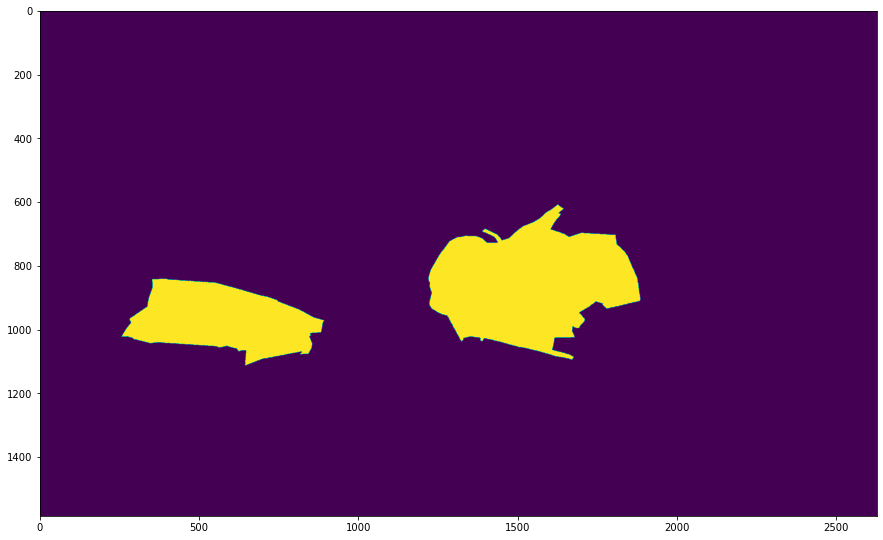

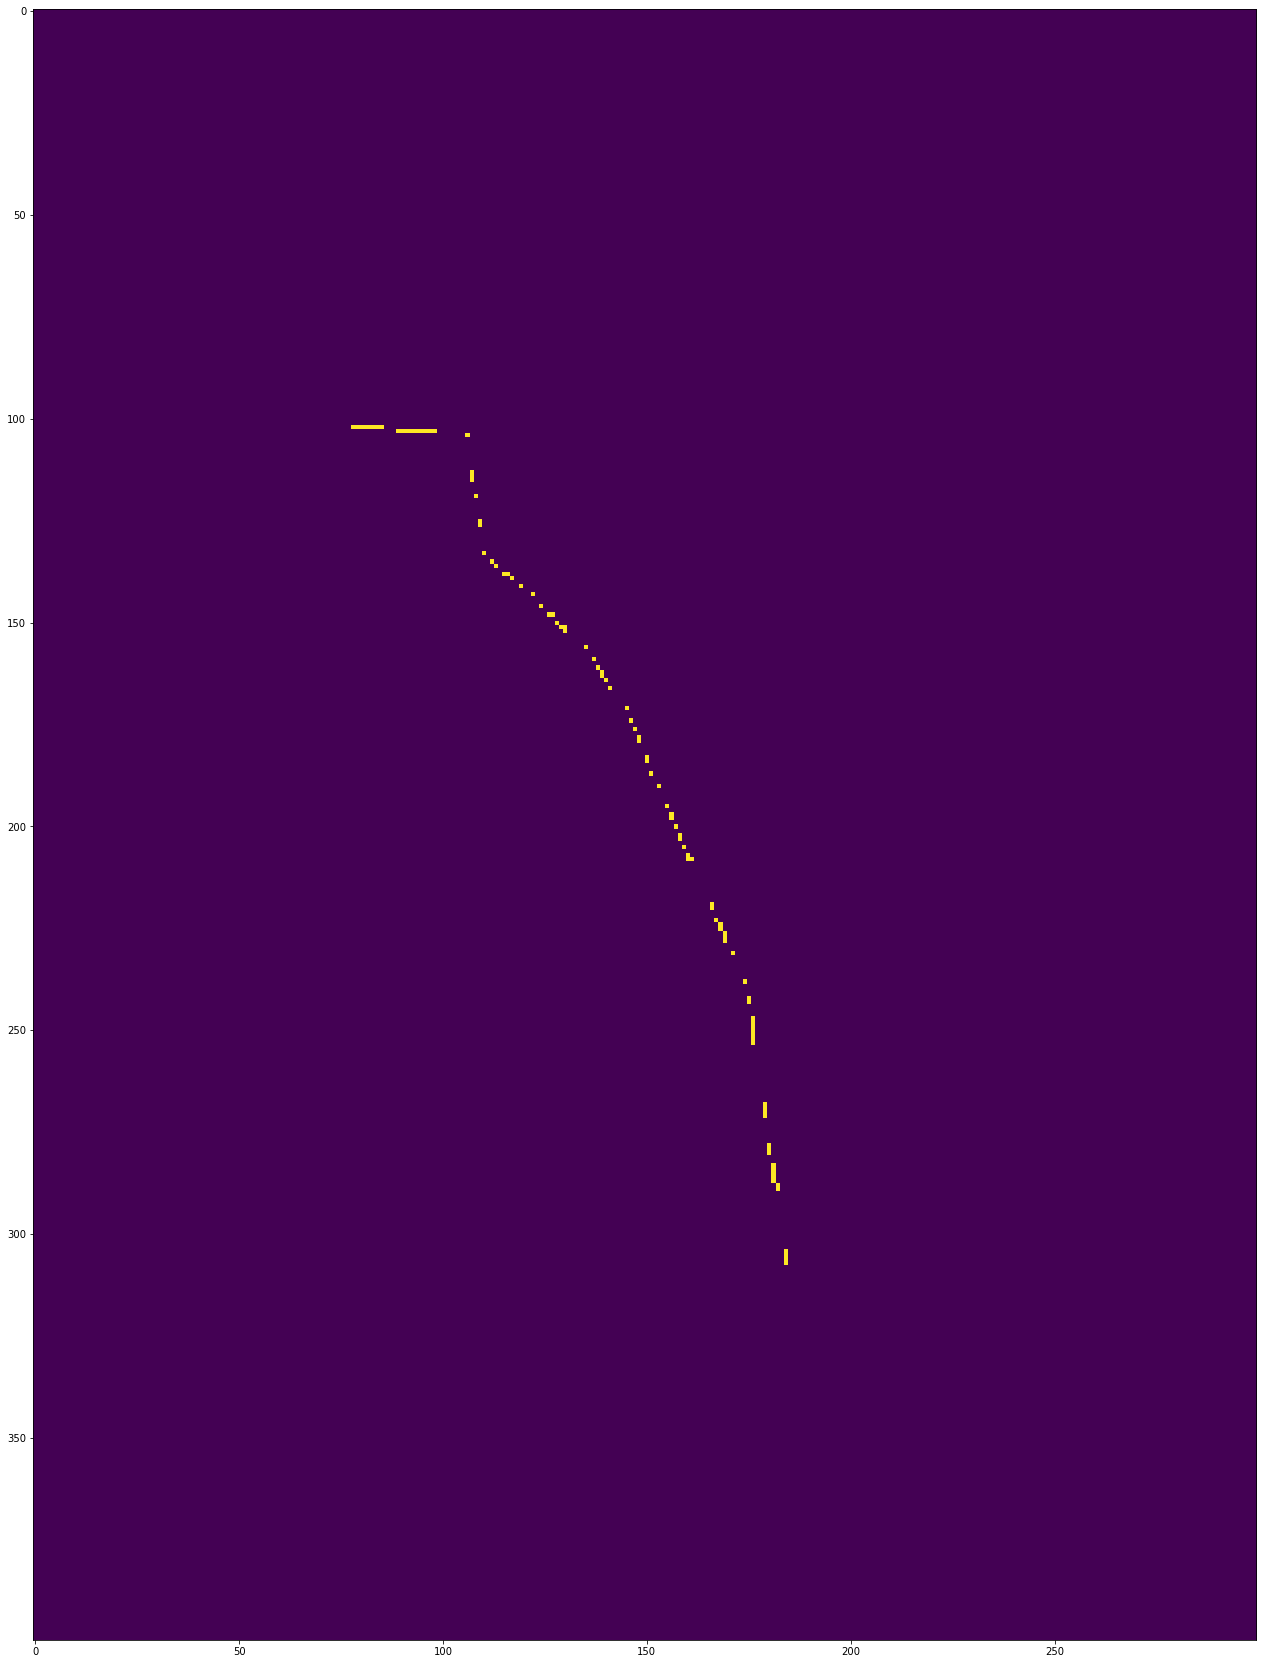

In [297]:
import numpy as np
mask_big=big['img'][0]!=0
mask_B=np.pad(mask,((551,361),(174,635)),'constant',constant_values = (0,0))
plt.figure(figsize=(15,15))
plt.imshow(mask_B)
plt.show()
sub=(mask_big==1) & (mask_B==0)
plt.figure(figsize=(30,30))
plt.imshow(sub[600:1000,1700:2000])
plt.show()


In [330]:
import osr
def tif_save_bands(img,save_name,trf,p='4326'):
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(save_name,img.shape[2],img.shape[1],img.shape[0],6,['COMPRESS=LZW','BIGTIFF=YES'])
    new_img.SetGeoTransform(trf)
    
    if p=='4326':
        sref = osr.SpatialReference()
        sref.ImportFromEPSG(4326)
        proj = sref.ExportToWkt()
    else:
        proj=p
    new_img.SetProjection(proj)
    for i in range(img.shape[0]):
        new_img.GetRasterBand(i+1).WriteArray(img[i,:,:])
    new_img.FlushCache()
    del new_img

In [336]:
f3=glob('/data4/Ukraine_img/M/*rep')

43

In [11]:
import gdal
from glob import glob
import matplotlib.pyplot as plt
f3=glob('/data4/Ukraine_img/U_band2348/*cut_reprojection.tif')
# ds=gdal.Open('/data4/Ukraine_img/U_bandother/227.tif').ReadAsArray()
f3.sort()
f3

['/data4/Ukraine_img/U_band2348/20210910T082601_20210910T083119_T37TCN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220227T082911_20220227T083303_T37TCN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220309T082801_20220309T083304_T37TCN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220309T082801_20220309T083304_T37TDN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220314T082719_20220314T083610_T37TCN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220314T082719_20220314T083610_T37TDN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220319T082651_20220319T083304_T37TCN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220319T082651_20220319T083304_T37TDN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220324T082609_20220324T083426_T37TCN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220324T082609_20220324T083426_T37TDN_cut_reprojection.tif',
 '/data4/Ukraine_img/U_band2348/20220329T082601_20220329T083

In [ ]:
def read_img(path):
    ds=gdal.Open(path)
    img=ds.ReadAsArray()
    trf=ds.GetGeoTransform()
    return {'img':img,'trf':trf}
for i in f3:
    print(i)
    img=read_img(i)['img']/5000*255
    plt.figure(figsize=(30,30))
    plt.imshow(img[:3].transpose((1,2,0)).astype('uint8'))
    plt.show()

In [335]:
len(os.listdir('/data4/Ukraine_img/M/'))

129

In [359]:
for i in dd_f.keys():
    print(i)
    img=read_img(dd_f[i])['img']/3000*255
    plt.figure(figsize=(30,30))
    plt.imshow(img[:3].transpose((1,2,0)).astype('uint8'))
    plt.show()


array([[ 80.92    ,  97.495   ,  99.024994,  81.515   ,  81.939995,
         86.615   ,  86.615   ,  83.725006,  82.365005,  78.795   ],
       [ 92.225006,  95.454994,  79.729996,  92.73499 ,  84.405   ,
         84.405   ,  77.35    ,  76.5     ,  80.665   ,  81.770004],
       [ 86.785   ,  78.88    ,  82.365005,  86.954994,  77.86    ,
         77.86    ,  76.5     ,  75.225   ,  83.555   ,  84.065   ],
       [ 77.009995,  80.665   ,  81.770004,  79.305   ,  79.305   ,
         75.649994,  75.565   ,  78.54    ,  82.45    ,  80.41    ],
       [ 77.265   ,  82.705   ,  93.5     ,  80.92    ,  80.92    ,
         81.09    ,  78.200005,  77.775   ,  78.369995, 105.314995],
       [ 77.52    ,  84.744995,  92.99    ,  92.99    ,  79.814995,
         76.5     ,  77.35    ,  76.67    ,  88.91    , 108.884995],
       [ 78.795   ,  81.770004,  82.195   ,  82.195   ,  78.200005,
         77.435005,  77.35    ,  81.770004,  94.775   ,  88.229996],
       [ 82.195   ,  90.95    ,  90.95   

In [360]:
img[0].max()

410.975

In [355]:
img[:3].transpose((1,2,0)).shape

(673, 1818, 3)

In [ ]:
n=0
mask=read_img('/data4/Ukraine_img/U_band2348/20210910T082601_20210910T083119_T37TCN_cut_reprojection.tif')['img'][0]!=0
for i in dd_f.keys():
    print(i)
    big=read_img(i)
    small=read_img(dd_f[i])
    # break

    # plt.figure(figsize=(15,15))
    # plt.imshow(np.pad(mask,((551,361),(174,635)),'constant',constant_values = (0,0)))
    # plt.show()
    mask2=small['img'][0]!=0
    # plt.figure(figsize=(15,15))
    # plt.imshow(np.pad(mask2,((551,361),(174,635)),'constant',constant_values = (0,0)))
    # plt.show()
    mask3=(mask==1) & (mask2==0)
    mask4=np.pad(mask3,((551,361),(174,635)),'constant',constant_values = (0,0))
    plt.figure(figsize=(15,15))
    plt.imshow(mask4)
    plt.show()
    for ii in range(10):
        big['img'][ii][mask4==1]=0
    tif_save_bands(big['img'],i.replace('.tif','_cut.tif'),big['trf'],p='4326')

In [337]:
import torch
k=torch.load('/ssd/hk/Ukraine_samples/split_coord_v2/val.pth')

In [349]:
i=torch.load('/ssd/hk/Ukraine_samples/samplesv1/samples/area4_20220227T082911-20220227T083303-T37TCN_055269.pth')[2]
i=torch.load('/ssd/hk/Ukraine_samples/samplesv1/samples/area1_20220222T082839-20220222T082842-T37TCN_079078.pth')[2]
i=torch.load('/ssd/hk/Ukraine_samples/samplesv1/samples/area4_20220503T082559-20220503T083512-T37TCN_041256.pth')[2]

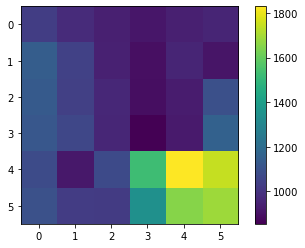

In [350]:
plt.imshow(i[0])
plt.colorbar()

(673, 1818)

In [155]:
for i,k in enumerate(ff_d):
    if not os.path.exists(ff_d[k]):
        print(ff_d[k])

In [1]:
import gdal
ds1=gdal.Open('/data4/WRF/rj/trans/suitability.tif')
print(ds1.GetGeoTransform())
print(ds1.GetProjection())
print(ds1.ReadAsArray().shape)

(6185506.66046063, 1079.9999999999966, 0.0, 5903591.38403237, 0.0, -922.9999999999999)
PROJCS["unknown",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Cylindrical_Equal_Area"],PARAMETER["standard_parallel_1",30],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [2]:

import gdal
ds2=gdal.Open('/data4/WRF/rj/trans/SSP5_2050.tif')
print(ds2.GetGeoTransform())
print(ds2.GetProjection())

(6185506.66046063, 1079.9999999999966, 0.0, 5903591.38403237, 0.0, -922.9999999999999)
PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 Global",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Cylindrical_Equal_Area"],PARAMETER["standard_parallel_1",30],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6933"]]


In [ ]:
print(ds2.ReadAsArray().shape)

In [1]:
import geopandas as gpd
from glob import glob
glob('/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/*.shp')


['/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/points.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/landuse.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/roads.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/places.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/natural.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/buildings.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/waterways.shp',
 '/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/railways.shp']

In [41]:
f.iloc[0]

osm_id                                               50449693
name                                                     None
type                                                   school
geometry    POLYGON ((37.5127161 47.1869425, 37.5132419 47...
Name: 0, dtype: object

In [2]:
for i in list(set(building_type)):
    print(i,np.array(f['type']==i).sum())

NameError: name 'building_type' is not defined

In [2]:
import geopandas as gpd
f=gpd.read_file('/home/hk/python_script/Ukraine/data/UNOSAT/OSM_MandL/buildings.shp')
del f['name']
building_type=list(f['type'])
building_type=[i if i is not None else 'Nonee' for i in building_type]
f['type']=building_type
points=[i.centroid for i in f['geometry']]
point_gpd=f.copy()
point_gpd['geometry']=points
point_gpd

,osm_id,type,geometry
0,50449693,school,POINT (37.51316 47.18676)
1,50449694,Nonee,POINT (37.51301 47.18652)
2,93130390,Nonee,POINT (37.55535 47.11385)
3,93130424,Nonee,POINT (37.56023 47.14006)
4,93953126,Nonee,POINT (37.55990 47.10670)
...,...,...,...
110710,1116104061,Nonee,POINT (37.31749 47.04477)
110711,1116104062,Nonee,POINT (37.31732 47.04444)
110712,1116104063,Nonee,POINT (37.31719 47.04577)
110713,1116104064,Nonee,POINT (37.31648 47.04539)


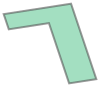

In [7]:
f.iloc[0]['geometry']

In [ ]:
poly1

/data4/Ukraine_img/M_and_L_inference/earliest_damaged_date.tif

<AxesSubplot:>

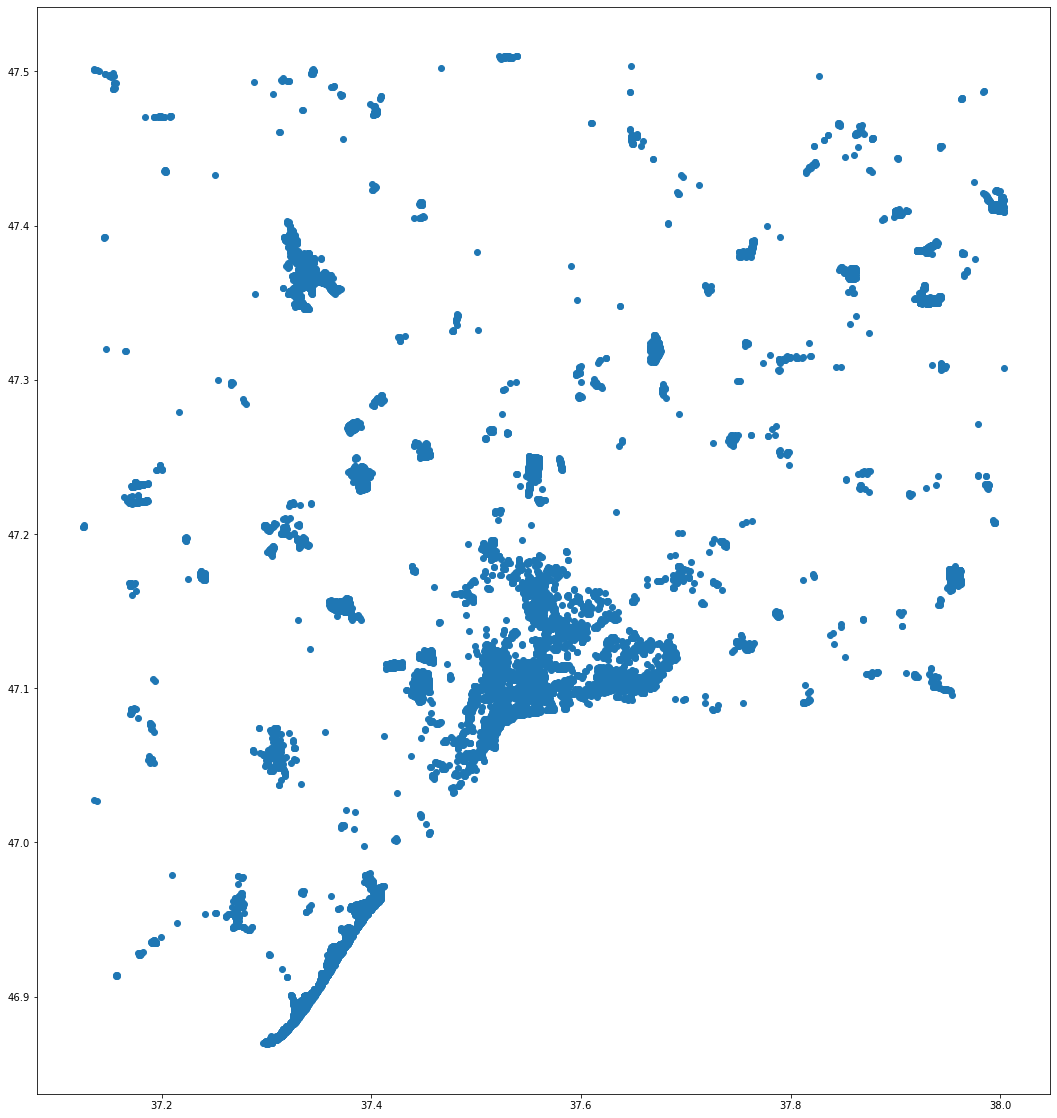

In [6]:
point_gpd[point_gpd['type']=='Nonee'].plot(figsize=(20,20))

In [7]:
len(point_gpd)

110715

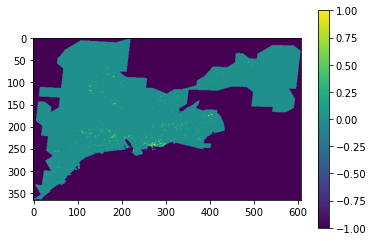

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.colorbar()
plt.show()

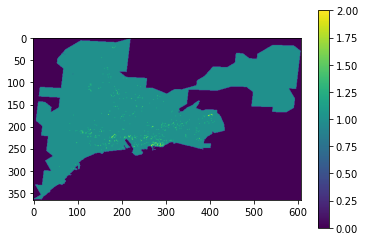

In [21]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.colorbar()
plt.show()

In [23]:
from shapely.geometry import MultiPolygon, Polygon, LineString
import gdal
ds=gdal.Open('/data4/Ukraine_img/M_and_L_inference/20220528T082611_20220528T083641_T37TCN2_MRSV2.tif')
img=ds.ReadAsArray()
img[img==1]=2
img[img==0]=1
img[img==-1]=0
trf=ds.GetGeoTransform()
def get_patch_geometry(trf,coord):
    lightup_all=[trf[0]-trf[1]/2,trf[3]-trf[5]/2]
    patch_size=trf[1]
    lightup_patch=[lightup_all[0]+patch_size*coord[0],lightup_all[1]-patch_size*coord[1]]
    bound=[(lightup_patch[0],lightup_patch[1]),
        (lightup_patch[0]+patch_size,lightup_patch[1]),
        (lightup_patch[0]+patch_size,lightup_patch[1]-patch_size),
        (lightup_patch[0],lightup_patch[1]-patch_size)]
    square=Polygon(bound)
    return square
from tqdm import tqdm
geometry=[]
value=[]
coords=[]
for x in tqdm(range(img.shape[1])):
    for y in range(img.shape[0]):
        if img[y,x]>1:
            geometry.append(get_patch_geometry(trf,[x,y]))
            value.append(img[y,x])
            coords.append([y,x])
        elif img[y,x]==-1:
            geometry.append(get_patch_geometry(trf,[x,y]))
            value.append(0)
            coords.append([y,x])            
import datetime
date_index={}
for i in range(25):
    date_index[i*5+4]=(datetime.datetime.strptime('2022-2-27', "%Y-%m-%d")+datetime.timedelta(days=5*i)).strftime("%Y-%m-%d")
date_index[0]=None
date_index[1]=None
date_index[2]=None
date=[date_index[i] for i in value]
id=list(range(len(value)))
patch_ploygon=gpd.GeoDataFrame({'patch_id':id,'geometry':geometry,'date_id':value,'coords':coords,'date':date})

100%|██████████| 607/607 [00:00<00:00, 1026.26it/s]


<AxesSubplot:>

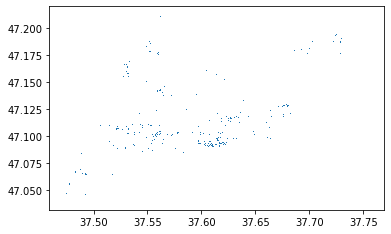

In [30]:
patch_ploygon.plot()

In [32]:
join=gpd.sjoin(patch_ploygon,f)

/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [33]:
print(len(patch_ploygon),len(join))

654 1652


In [34]:
import pandas as pd
# print(len(join[join['date_id']>0]))
pd.value_counts(list(join['type']))

house            1311
Nonee             149
detached           70
industrial         66
apartments         35
garages            11
service             2
kindergarten        2
roof                2
school              2
grandstand          1
sports_centre       1
dtype: int64

In [36]:
use_patch=list(set(join['patch_id']))
patch=list(set(patch_ploygon['patch_id']))
nouse_patch=[i for i in patch if i not in use_patch]
print(len(patch),len(use_patch),len(nouse_patch))

654 420 234


In [37]:
patch_ploygon2=patch_ploygon.copy()

for i in nouse_patch:
    k=patch_ploygon2[patch_ploygon2['patch_id']==i].index
    patch_ploygon2=patch_ploygon2.drop(k)

In [38]:
len(patch_ploygon2)

420

In [40]:
shp_pathes=['/home/hk/python_script/Ukraine/data/UNOSAT/LivoberezhnyiandZhovtnevyi_0314/Zhovtnevyi.shp',
'/home/hk/python_script/Ukraine/data/UNOSAT/LivoberezhnyiandZhovtnevyi_0314/Livoberezhnyi.shp',
'/home/hk/python_script/Ukraine/data/UNOSAT/Azovstal_0425/Azovstal_ROI.shp']
shps=[gpd.read_file(i).to_crs(4326) for i in shp_pathes]
patch_js=[gpd.sjoin(patch_ploygon2,i) for i in shps]
print('Zhovtnevyi:',len(patch_js[0]),len(patch_js[0])/420)
print('Livoberezhnyi:',len(patch_js[1]),len(patch_js[1])/420)
print('Azovstal:',len(patch_js[2]),len(patch_js[2])/420)


Zhovtnevyi: 130 0.30952380952380953
Livoberezhnyi: 127 0.30238095238095236
Azovstal: 56 0.13333333333333333


/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """
/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """
/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """


In [42]:
del join['index_right']

In [43]:
patch_js2=[gpd.sjoin(join,i) for i in shps]
print('Zhovtnevyi:',len(patch_js2[0]))
print('Livoberezhnyi:',len(patch_js2[1]))
print('Azovstal:',len(patch_js2[2]))

/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.
/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


Zhovtnevyi: 680
Livoberezhnyi: 520
Azovstal: 93


/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [44]:
for i in range(3):
    print('-'*20)
    print(pd.value_counts(list(patch_js2[i]['type'])))

--------------------
house           629
Nonee            40
apartments        5
garages           3
kindergarten      1
grandstand        1
school            1
dtype: int64
--------------------
house         444
apartments     23
Nonee          22
industrial     18
detached        9
garages         4
dtype: int64
--------------------
Nonee         62
industrial    31
dtype: int64


In [128]:
1375-628-444-1

302

In [129]:
28-4-23

1

In [45]:
nouse_patch_coords=[]
for i in nouse_patch:

    nouse_patch_coords.append(patch_ploygon.iloc[i]['coords'])

In [62]:
from glob import glob
fs=glob('/data4/Ukraine_img/M_and_L_inference/*_MRSV2.tif')
fs.sort()
imgs=[]
for f in fs:
    print(f)
    ds=gdal.Open(f)
    imgs.append(ds.ReadAsArray())


/data4/Ukraine_img/M_and_L_inference/20220227T082911_20220227T083303_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220309T082801_20220309T083304_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220314T082719_20220314T083610_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220319T082651_20220319T083304_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220324T082609_20220324T083426_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220329T082601_20220329T083216_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220403T082559_20220403T083553_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220428T082611_20220428T083305_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220503T082559_20220503T083512_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220508T082611_20220508T083304_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/20220523T082559_20220523T082946_T37TCN2_MRSV2.tif
/data4/Ukraine_img/M_and_L_inference/202205

In [58]:
nouse_patch_coords

[[325, 22],
 [323, 23],
 [325, 25],
 [307, 29],
 [311, 37],
 [257, 51],
 [201, 53],
 [256, 57],
 [257, 57],
 [327, 58],
 [326, 67],
 [238, 69],
 [293, 103],
 [293, 104],
 [243, 106],
 [196, 115],
 [248, 122],
 [124, 123],
 [104, 125],
 [110, 125],
 [118, 125],
 [104, 128],
 [110, 128],
 [116, 128],
 [109, 129],
 [109, 130],
 [118, 130],
 [119, 130],
 [120, 130],
 [108, 131],
 [110, 131],
 [118, 131],
 [119, 131],
 [120, 131],
 [124, 131],
 [125, 131],
 [99, 133],
 [125, 133],
 [98, 141],
 [86, 143],
 [103, 144],
 [122, 154],
 [122, 156],
 [122, 157],
 [94, 158],
 [102, 158],
 [124, 158],
 [106, 159],
 [96, 160],
 [206, 160],
 [73, 162],
 [133, 162],
 [57, 163],
 [204, 166],
 [207, 166],
 [64, 167],
 [81, 167],
 [68, 168],
 [82, 168],
 [68, 169],
 [81, 169],
 [209, 169],
 [83, 170],
 [81, 172],
 [210, 172],
 [211, 173],
 [252, 173],
 [144, 174],
 [211, 174],
 [150, 175],
 [85, 177],
 [149, 179],
 [183, 180],
 [148, 181],
 [150, 181],
 [148, 182],
 [151, 182],
 [148, 184],
 [148, 185],
 

In [63]:
for i in nouse_patch_coords:
    x,y=i[0],i[1]
    for img in imgs:
        if img[x,y]==1:
            img[x,y]=0

In [64]:
from pybob.GeoImg import GeoImg
import osr
trf=ds.GetGeoTransform()
def tif_save(img,save_name,trf,p='4326'):
    driver=gdal.GetDriverByName('GTiff')
    new_img=driver.Create(save_name,img.shape[1],img.shape[0],1,6,['COMPRESS=LZW','BIGTIFF=YES'])
    new_img.SetGeoTransform(trf)
    
    if p=='4326':
        sref = osr.SpatialReference()
        sref.ImportFromEPSG(4326)
        proj = sref.ExportToWkt()
    else:
        proj=p
    new_img.SetProjection(proj)
    new_img.GetRasterBand(1).SetNoDataValue(0)
    new_img.GetRasterBand(1).WriteArray(img)
    new_img.FlushCache()
    del new_img
for i in range(len(fs)):
    tif_save(imgs[i],fs[i].replace('_MRSV2','_MRSV3'),trf)

<AxesSubplot:>

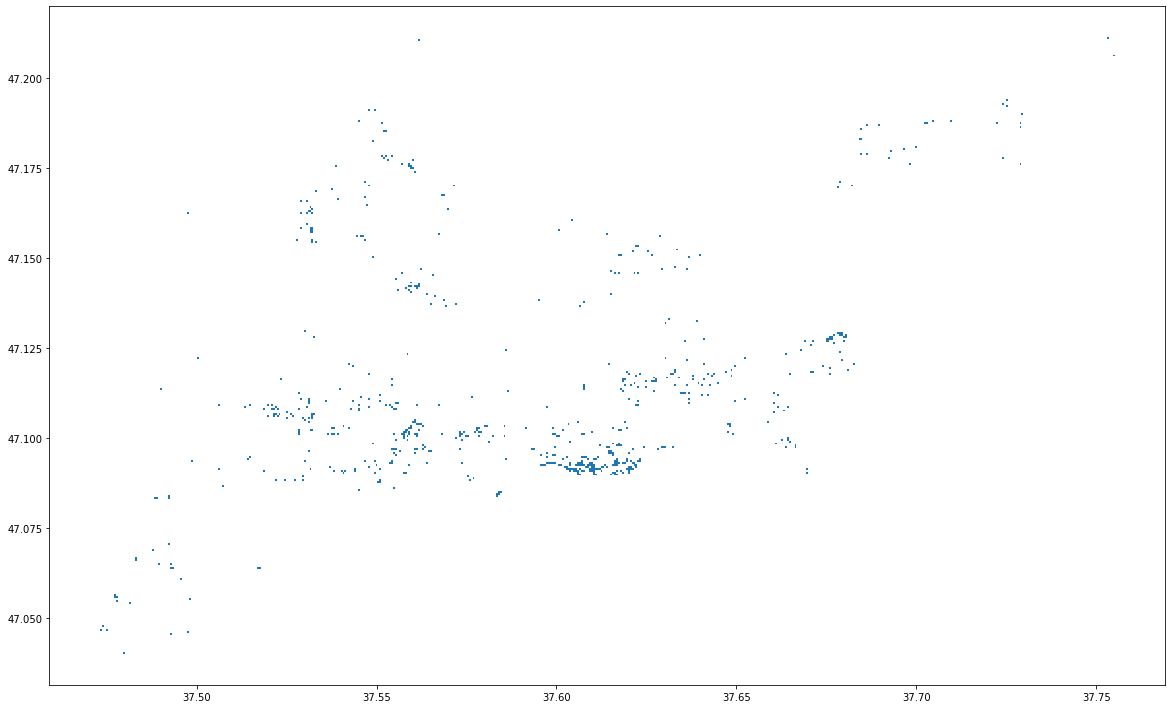

In [57]:
patch_ploygon.plot(figsize=(20,20))

<AxesSubplot:>

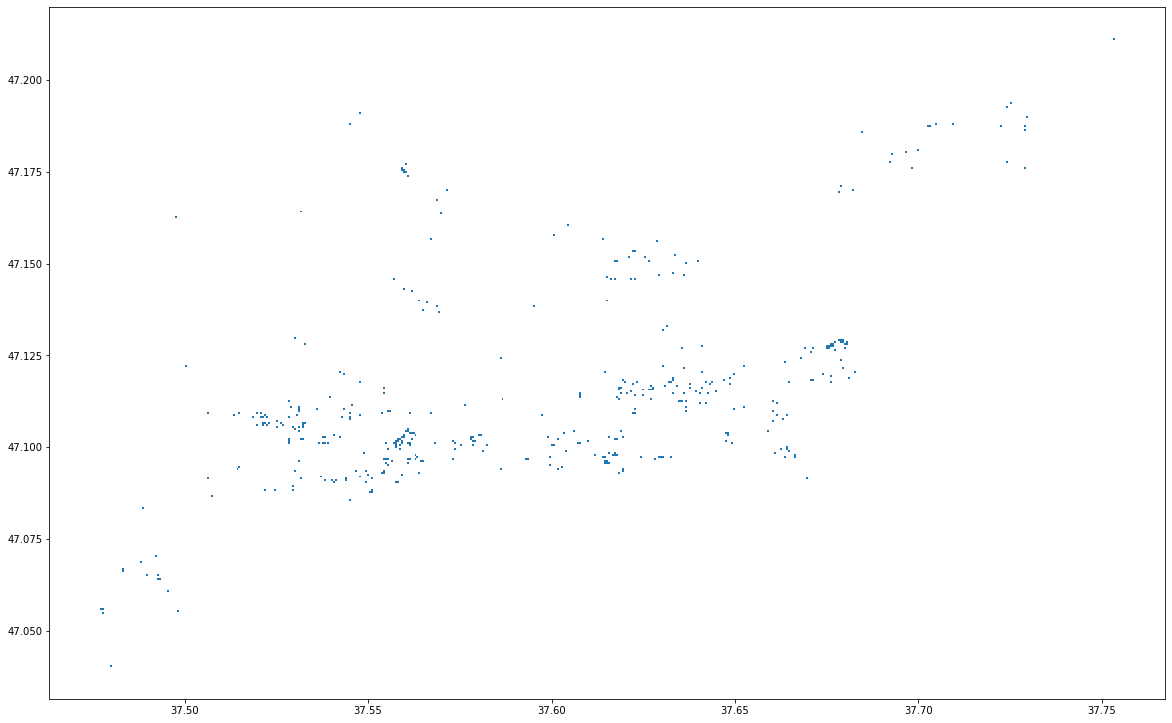

In [50]:
patch_ploygon2.plot(figsize=(20,20))

In [65]:
from glob import glob
fs=glob('/data4/Ukraine_img/M_and_L_inference/*_MRSV3.tif')
fs.sort()
imgs=[]
for f in fs:
    print(f)
    ds=gdal.Open(f)
    imgs.append(ds.ReadAsArray())
for i in imgs:
    i+=1
for i in range(len(fs)):
    tif_save(imgs[i],fs[i].replace('_MRSV3','_MRSV4'),trf)

/data4/Ukraine_img/M_and_L_inference/20220227T082911_20220227T083303_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220309T082801_20220309T083304_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220314T082719_20220314T083610_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220319T082651_20220319T083304_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220324T082609_20220324T083426_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220329T082601_20220329T083216_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220403T082559_20220403T083553_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220428T082611_20220428T083305_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220503T082559_20220503T083512_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220508T082611_20220508T083304_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/20220523T082559_20220523T082946_T37TCN2_MRSV3.tif
/data4/Ukraine_img/M_and_L_inference/202205

In [1]:
import gdal
from glob import glob

In [2]:
fs=glob('/data4/Ukraine_img/M_and_L_inference/*_MRSV4.tif')
fs.sort()

In [8]:
img=gdal.Open(fs[11]).ReadAsArray()
import matplotlib.pyplot as plt

In [10]:
fs[11]

'/data4/Ukraine_img/M_and_L_inference/20220528T082611_20220528T083641_T37TCN2_MRSV4.tif'

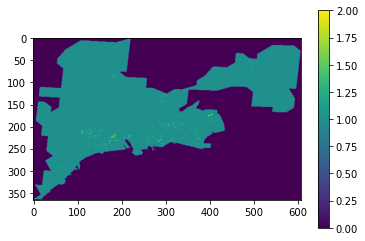

In [9]:
plt.imshow(img)
plt.colorbar()


In [79]:
f=gpd.read_file('/home/hk/python_script/Ukraine/data/UNOSAT/LivoberezhnyiandZhovtnevyi_0314/UNOSAT_Mariupol_Livoberezhyny_AOI_12May2022.shp')

In [80]:
f['region']=['Livoberezhnyi','Zhovtnevyi']

In [83]:
f[f['region']=='Livoberezhnyi'].to_file('/home/hk/python_script/Ukraine/data/UNOSAT/LivoberezhnyiandZhovtnevyi_0314/Livoberezhnyi.shp')

In [84]:
f[f['region']=='Zhovtnevyi'].to_file('/home/hk/python_script/Ukraine/data/UNOSAT/LivoberezhnyiandZhovtnevyi_0314/Zhovtnevyi.shp')

In [140]:
join=gpd.sjoin(patch_ploygon,point_gpd)

/home/hk/miniconda3/envs/pythonhzy/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [141]:
import pandas as pd
print(len(join[join['date_id']>0]))
pd.value_counts(list(join[join['date_id']>0]['type']))

2816


house           2576
Nonee             77
detached          68
apartments        41
garages           25
industrial        19
kindergarten       4
church             2
clinic             2
grandstand         1
hangar             1
dtype: int64

In [138]:
print(len(join))
pd.value_counts(list(join['type']))

62325


house            43921
detached          9443
None              4472
apartments        2165
industrial         986
garages            748
roof                95
kindergarten        81
chimney             66
commercial          51
school              51
service             47
church              34
retail              27
university          25
college             18
public              13
silo                12
garage              12
grandstand           9
government           4
tower                3
office               3
train_station        3
clinic               3
dormitory            3
hangar               3
shelter              3
sports_centre        2
gatehouse            2
hotel                2
residential          2
sports_hall          2
civic                2
hospital             2
lighthouse           1
shed                 1
greenhouse           1
monument             1
kiosk                1
depot                1
hut                  1
construction         1
supermarket

In [143]:
import pandas as pd
print(len(join[(join['date_id']>13) & (join['date_id']<40)]))
pd.value_counts(list(join[(join['date_id']>13) & (join['date_id']<40)]['type']))

186


house         173
Nonee           9
apartments      2
detached        2
dtype: int64

In [144]:
import pandas as pd
print(len(join[(join['date_id']>68) & (join['date_id']<105)]))
pd.value_counts(list(join[(join['date_id']>68) & (join['date_id']<105)]['type']))

2617


house           2394
Nonee             68
detached          62
apartments        39
garages           25
industrial        19
kindergarten       4
church             2
clinic             2
grandstand         1
hangar             1
dtype: int64

In [145]:
date_index

{4: '2022-02-27',
 9: '2022-03-04',
 14: '2022-03-09',
 19: '2022-03-14',
 24: '2022-03-19',
 29: '2022-03-24',
 34: '2022-03-29',
 39: '2022-04-03',
 44: '2022-04-08',
 49: '2022-04-13',
 54: '2022-04-18',
 59: '2022-04-23',
 64: '2022-04-28',
 69: '2022-05-03',
 74: '2022-05-08',
 79: '2022-05-13',
 84: '2022-05-18',
 89: '2022-05-23',
 94: '2022-05-28',
 99: '2022-06-02',
 104: '2022-06-07',
 109: '2022-06-12',
 114: '2022-06-17',
 119: '2022-06-22',
 124: '2022-06-27',
 0: None}